In [1]:
!nvidia-smi

Tue Jul 27 02:42:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 415.18       Driver Version: 415.18       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   31C    P8    12W / 250W |     26MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib notebook

In [3]:
regression_example = pd.read_csv("regression_example.csv")

In [4]:
regression_example

,id,energy
0,9a8b8bfc7a06afd346ff1c88f1f7a03316a9bc76,5.000252
1,2caa5748f814bbdbc64f4db43d7412ce359a777b,5.763174
2,b879970a23fc2a3b093bce85096808f13eaa69fb,5.746848
3,a4d3cb5abbdc11518bb67ae7f2c415de808effb3,5.509723
4,df8de9207196305057f73cea03d265ba720cb6e1,5.902919
...,...,...
16555,c813438fd16b678768b0dee2fedbec8b2bb06007,5.269460
16556,f7210e2befb66de502091534047312e0c98b616c,5.118006
16557,d1e8fd893185e2262b001127359eccf4a4c744ef,5.597142
16558,3615416c26f114445aecf1d56c2635b6f6e01957,5.089227


In [5]:
import imageio

im = imageio.imread('train/ER/0.6178290247917175__CYGNO_60_40_ER_30_keV_930V_30cm_IDAO_iso_crop_hist_pic_run3_ev288;1.png')
print(im.shape)

(576, 576)


In [6]:
import glob
glob.glob("train/ER/*10_keV*.png")[:5]

['train/ER/0.8819432258605957__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run4_ev212;1.png',
 'train/ER/0.6036946177482605__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run1_ev257;1.png',
 'train/ER/0.6526433229446411__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run4_ev915;1.png',
 'train/ER/-0.8938827514648438__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run2_ev850;1.png',
 'train/ER/0.26557791233062744__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run3_ev932;1.png']

In [7]:
glob.glob("train/NR/*1_keV*.png")[:5]

['train/NR/-2.849400043487549__CYGNO_60_40_He_NR_1_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run3_ev825;1.png',
 'train/NR/1.9068000316619873__CYGNO_60_40_He_NR_1_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run2_ev647;1.png',
 'train/NR/2.8896000385284424__CYGNO_60_40_He_NR_1_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run1_ev418;1.png',
 'train/NR/0.6547999978065491__CYGNO_60_40_He_NR_1_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run2_ev824;1.png',
 'train/NR/3.0104000568389893__CYGNO_60_40_He_NR_1_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run1_ev159;1.png']

In [8]:
"train/ER/0.8819432258605957__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run4_ev212;1.png".split('_keV')[0].split('_')[-1]

'10'

In [9]:
import tqdm
ER_images_raw = []
ER_targets = []
for imgpath in tqdm.tqdm(glob.glob(f"train/ER/*.png")):
    image = imageio.imread(imgpath)
    ER_images_raw.append(image)
    ER_targets.append(float(imgpath.split('_keV')[0].split('_')[-1]))
    
            
NR_images_raw = []
NR_targets = []
for imgpath in tqdm.tqdm(glob.glob(f"train/NR/*.png")):
    image = imageio.imread(imgpath)
    NR_images_raw.append(image)
    NR_targets.append(float(imgpath.split('_keV')[0].split('_')[-1]))

100%|██████████| 6646/6646 [00:12<00:00, 518.38it/s]


In [10]:
print (len(NR_targets), len(NR_images_raw))

6646 6646


In [11]:
print (len(ER_targets), len(ER_images_raw))

6758 6758


<IPython.core.display.Javascript object>


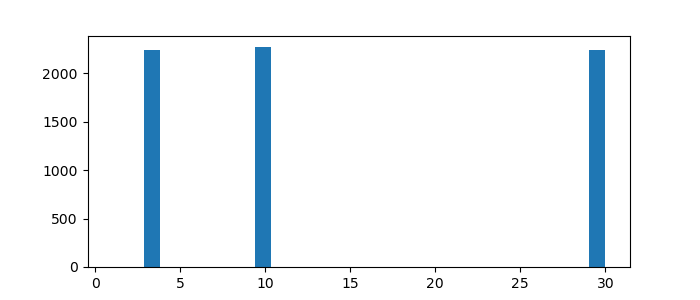

<IPython.core.display.Javascript object>


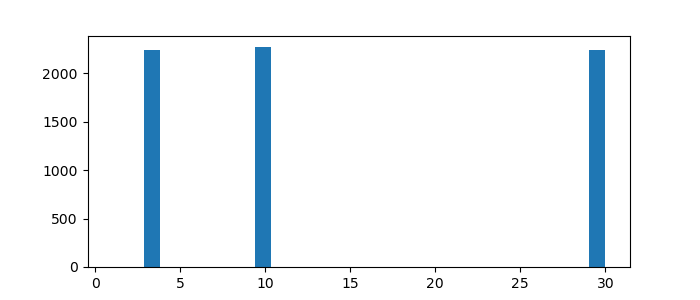

In [12]:
fig=plt.figure(figsize=(7,3))
plt.hist(ER_targets,bins=31)
fig.canvas.footer_visible = False
fig.canvas.resizable = False
# If true then scrolling while the mouse is over the canvas will not move the entire notebook
fig.canvas.capture_scroll = True
fig.canvas.toolbar_visible = True
display(fig.canvas)
display(fig)

<IPython.core.display.Javascript object>


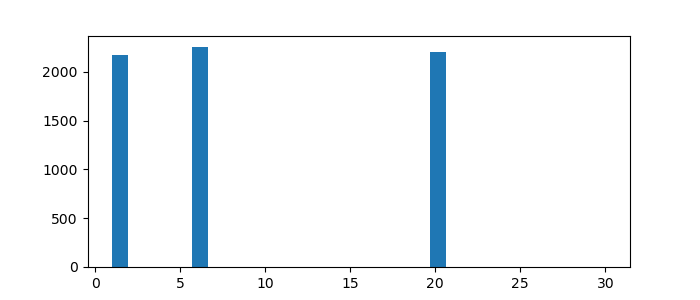

<IPython.core.display.Javascript object>


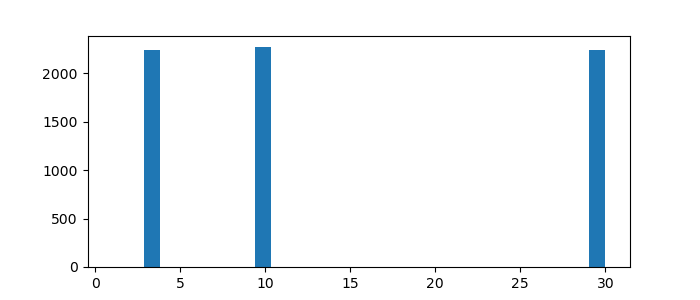

In [13]:
plt.figure(figsize=(7,3))
plt.hist(NR_targets,bins=31)
fig.canvas.footer_visible = False
fig.canvas.resizable = False
# If true then scrolling while the mouse is over the canvas will not move the entire notebook
fig.canvas.capture_scroll = True
fig.canvas.toolbar_visible = True
display(fig.canvas)
display(fig)

In [192]:
ER_images_raw = np.asarray(ER_images_raw)
NR_images_raw = np.asarray(NR_images_raw)

In [193]:
'''
print("Electron recoil (ER)")
for key in ER_images_raw.keys():
    print(key, ER_images_raw[key].shape)
print("Helium nucleus recoil (NR))")
for key in NR_images_raw.keys():
    print(key, NR_images_raw[key].shape)
'''
print("Electron recoil (ER):", ER_images_raw.shape)
print("Helium nucleus recoil (NR)):", NR_images_raw.shape)

Electron recoil (ER): (6758, 576, 576)
Helium nucleus recoil (NR)): (6646, 576, 576)


In [194]:
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import skimage
import skimage.measure

ER_images = np.asarray(ER_images_raw[:, 208:368, 208:368 ])
print (ER_images.shape, ER_images_raw.shape)
NR_images = np.asarray(NR_images_raw[:, 208:368, 208:368 ])
print (NR_images.shape, NR_images_raw.shape)


(6758, 160, 160) (6758, 576, 576)
(6646, 160, 160) (6646, 576, 576)


In [195]:
ER_targets = np.asarray(ER_targets)
NR_targets = np.asarray(NR_targets)


In [196]:
print("Electron recoil (ER)")
print(ER_images)
print("Helium nucleus recoil (NR))")
print(NR_images)

Electron recoil (ER)
[[[ 98 100  98 ...  99 103 102]
  [101 101 102 ...  94  98 100]
  [100  98 100 ... 100  95 101]
  ...
  [ 97  99 106 ...  90 103 100]
  [102 105 112 ... 101 104 102]
  [101  98 100 ...  98 103 104]]

 [[102  97 106 ...  97  93 102]
  [ 99 103 100 ...  96 104 100]
  [103 103 101 ... 100  91 100]
  ...
  [ 98  93 102 ...  92 102  99]
  [101  94  98 ...  97 104 103]
  [103  98 100 ... 102 101 102]]

 [[ 99 112  99 ...  99  99 101]
  [ 98 106  95 ... 104  96 102]
  [ 98 101 102 ...  99  96 101]
  ...
  [104 106 102 ... 101  98 101]
  [ 97 101 112 ...  97  97  98]
  [ 98  96  99 ... 104 101 101]]

 ...

 [[ 98  97 101 ... 101 104  99]
  [105 101  96 ... 101 104  96]
  [101 100 101 ...  98 102 103]
  ...
  [103 103 103 ...  98  99 101]
  [101 103 107 ... 103 100 100]
  [101  98  99 ...  97 100 102]]

 [[101  93 103 ... 100  96  97]
  [102 105 101 ... 103  98  99]
  [ 98 102 103 ...  99  96  98]
  ...
  [105  96 120 ...  96 101  97]
  [102  99 109 ... 100  98  99]
  [102 

In [197]:
print("Electron recoil (ER):", ER_images[:10], ER_targets[:10])
print("Helium nucleus recoil (NR)):", NR_images[:10], NR_targets[:10])

Electron recoil (ER): [[[ 98 100  98 ...  99 103 102]
  [101 101 102 ...  94  98 100]
  [100  98 100 ... 100  95 101]
  ...
  [ 97  99 106 ...  90 103 100]
  [102 105 112 ... 101 104 102]
  [101  98 100 ...  98 103 104]]

 [[102  97 106 ...  97  93 102]
  [ 99 103 100 ...  96 104 100]
  [103 103 101 ... 100  91 100]
  ...
  [ 98  93 102 ...  92 102  99]
  [101  94  98 ...  97 104 103]
  [103  98 100 ... 102 101 102]]

 [[ 99 112  99 ...  99  99 101]
  [ 98 106  95 ... 104  96 102]
  [ 98 101 102 ...  99  96 101]
  ...
  [104 106 102 ... 101  98 101]
  [ 97 101 112 ...  97  97  98]
  [ 98  96  99 ... 104 101 101]]

 ...

 [[103  97 100 ...  98 101 104]
  [101 103 101 ...  99 101  95]
  [104 100  99 ... 103  94 103]
  ...
  [ 99 100 102 ... 104 104  98]
  [105 101 105 ...  97 102 101]
  [101 107 100 ...  98 100 102]]

 [[111  99  99 ...  97 105 103]
  [100  99 102 ... 109  99  99]
  [103 103  99 ... 102 116 101]
  ...
  [100 100  95 ... 107  99 103]
  [100  97 108 ... 108  98 101]
  [100

<IPython.core.display.Javascript object>


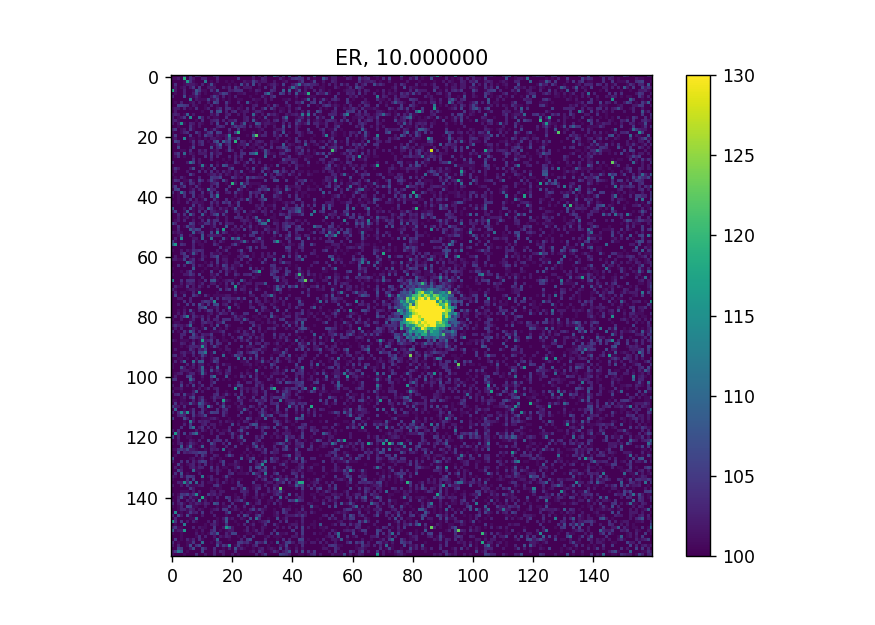

<IPython.core.display.Javascript object>


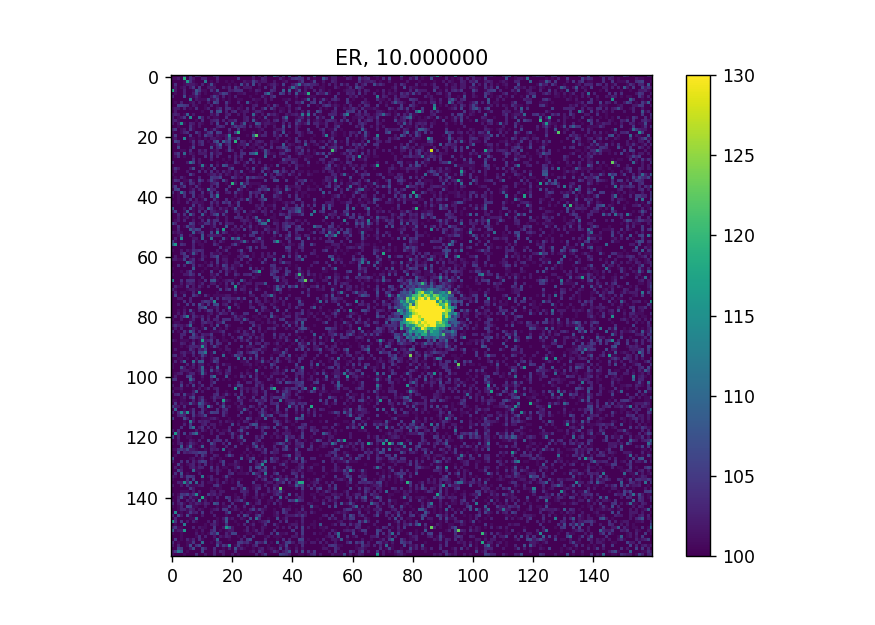

<IPython.core.display.Javascript object>


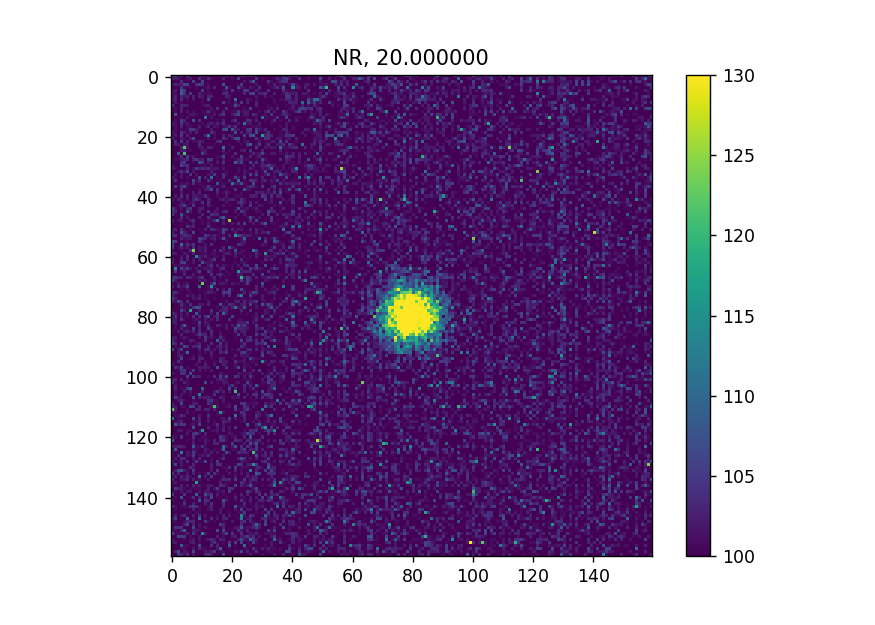

<IPython.core.display.Javascript object>


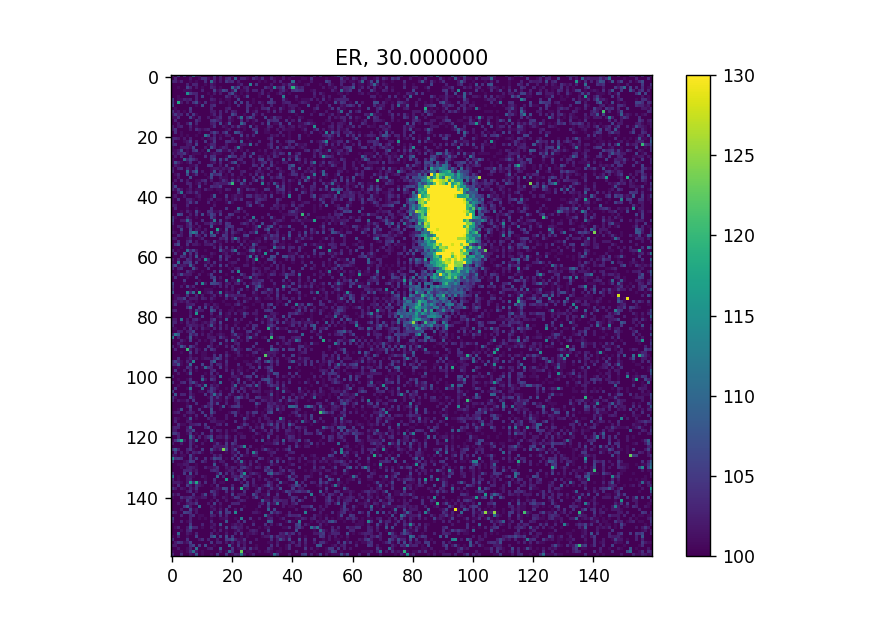

<IPython.core.display.Javascript object>


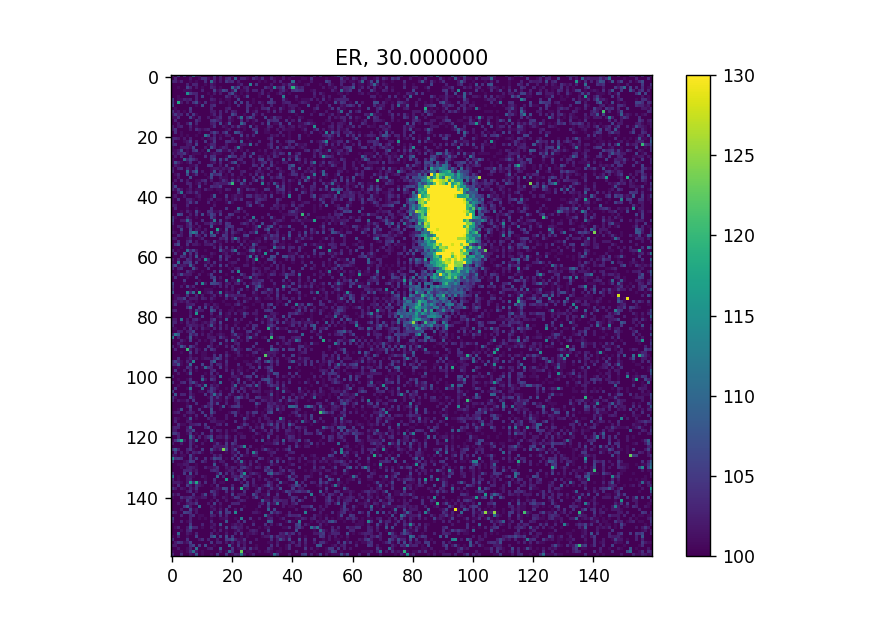

<IPython.core.display.Javascript object>


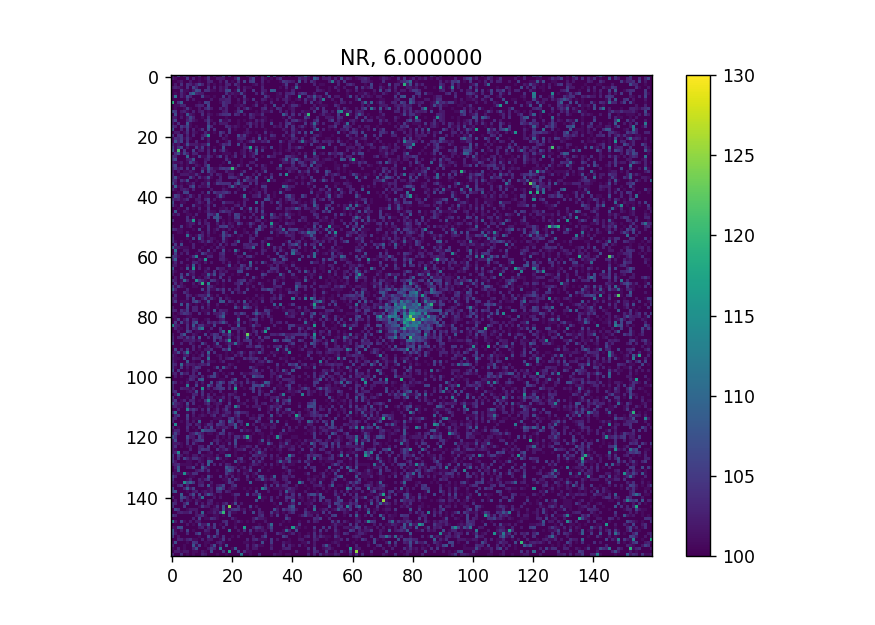

<IPython.core.display.Javascript object>


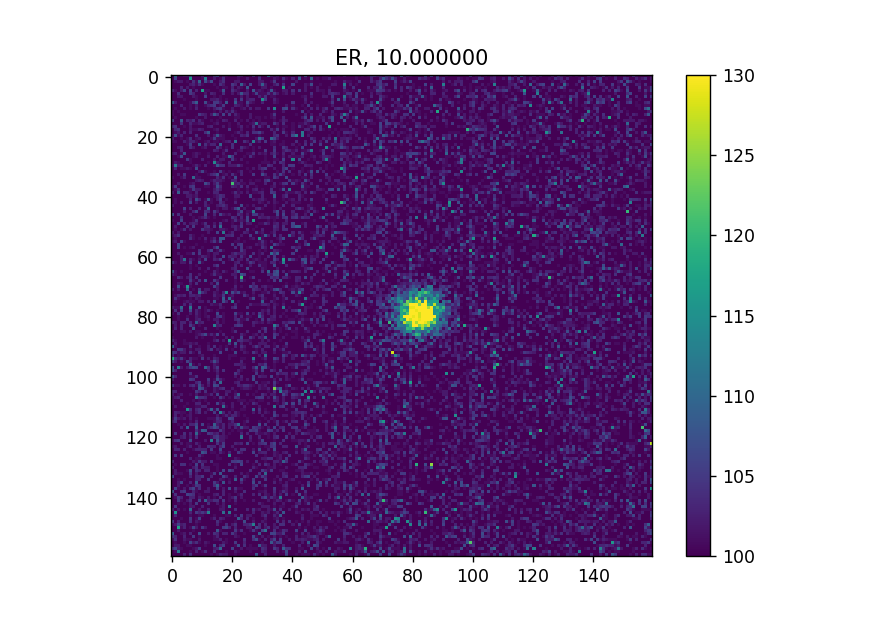

<IPython.core.display.Javascript object>


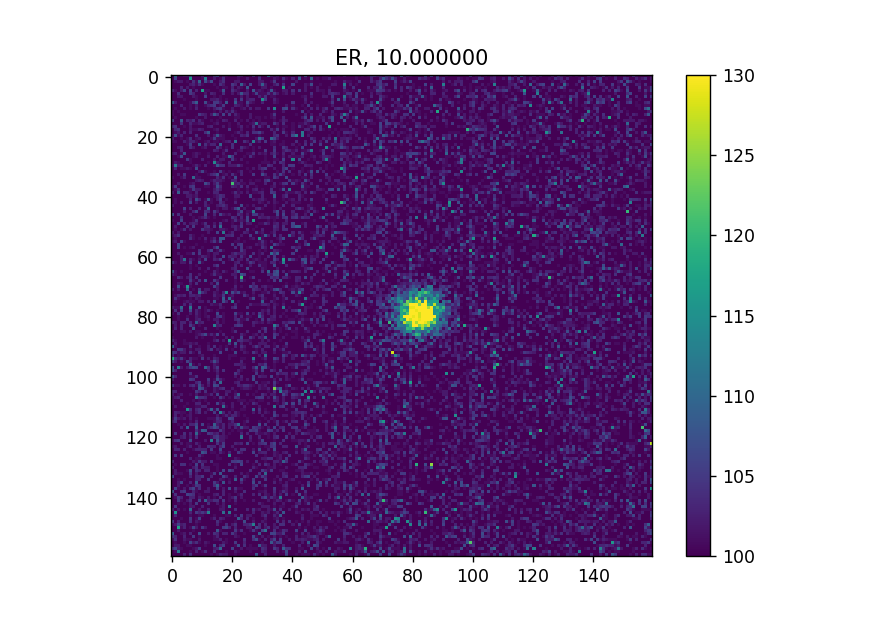

<IPython.core.display.Javascript object>


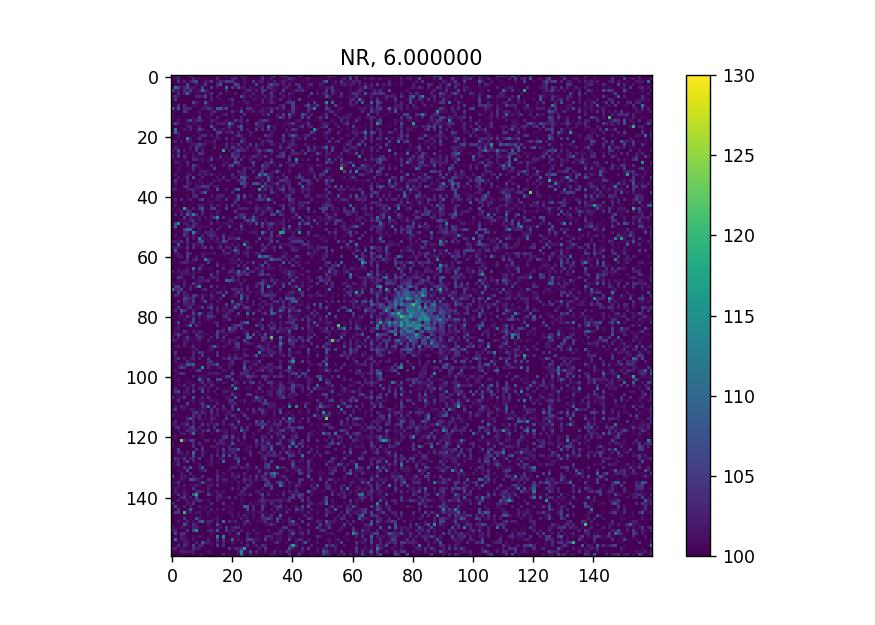

In [198]:
import matplotlib.pyplot as plt
for i in range(0,3):
    fig=plt.figure(figsize=(7,5))
    plt.imshow(np.max(ER_images[i:i+1,:,:], axis=0), vmin=100, vmax=130)
    plt.colorbar()
    plt.title(f"ER, %f"%ER_targets[i])
    plt.show()
    display(fig)
    
    fig = plt.figure(figsize=(7,5))
    plt.imshow(np.max(NR_images[i:i+1,:,:], axis=0), vmin=100, vmax=130)
    plt.colorbar()
    plt.title(f"NR, %f"%NR_targets[i])
    plt.show()
    display

In [199]:
ER_histcollection = []
NR_histcollection = []

for image in ER_images:
    imagehist, _ = np.histogram(image, bins=100, range=(100, 200))
    ER_histcollection.append(imagehist)

for image in NR_images:
    imagehist, _ = np.histogram(image, bins=100, range=(100, 200))
    NR_histcollection.append(imagehist)

In [200]:
print (NR_histcollection[0])

[3508 3411 2838 2059 1370  830  523  340  229  156  119  111   70   57
   37   44   31   23   27   16   17   25   10   12   17    9    8    5
    9   10    9    9    9    6    8    8    7    3    5    8    1    3
    7    3    5    4    7    1    3    3    3    3    0    1    1    2
    1    3    3    0    1    0    2    0    0    0    0    0    0    0
    0    0    0    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


6758
6758
(6758,) (6758,)


<IPython.core.display.Javascript object>


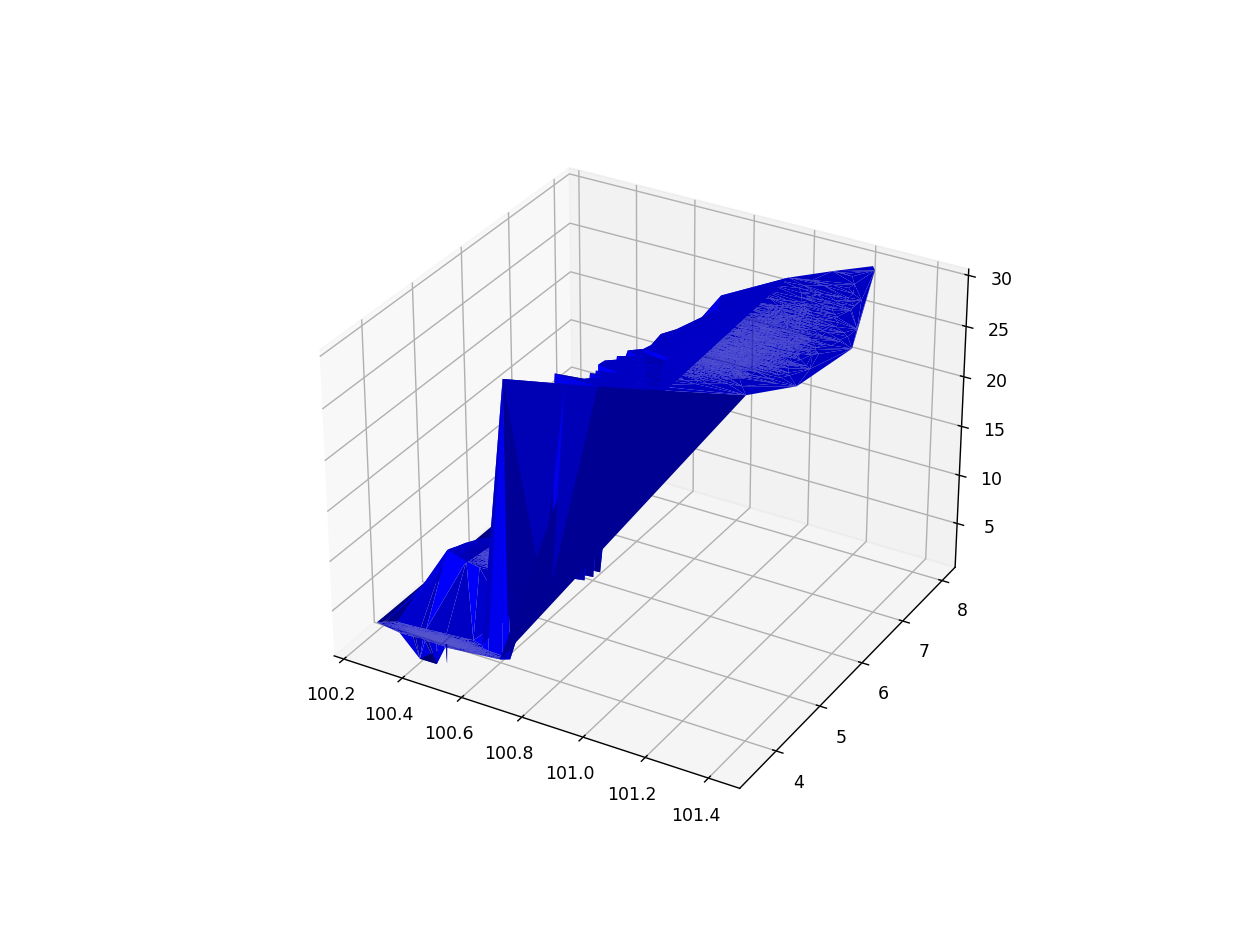

In [201]:
from mpl_toolkits.mplot3d import Axes3D

x = [np.mean(i) for i in ER_images]
print (len(x))
y = [np.std(i) for i in ER_images]
print (len(y))
z = np.asarray([i for i in ER_targets]).T
print (z.shape, z.T.shape)

fig = plt.figure(figsize=(10,7.5))
ax = fig.gca(projection='3d') 
surf = ax.plot_trisurf(x,y,z, linewidth=0., antialiased=True,  edgecolor='Gray', color='b')

ax.xaxis.set_label("Mean values of pixels")
ax.yaxis.set_label("Standard deviations of pixel values")
ax.zaxis.set_label("Energy")

plt.show()

<IPython.core.display.Javascript object>


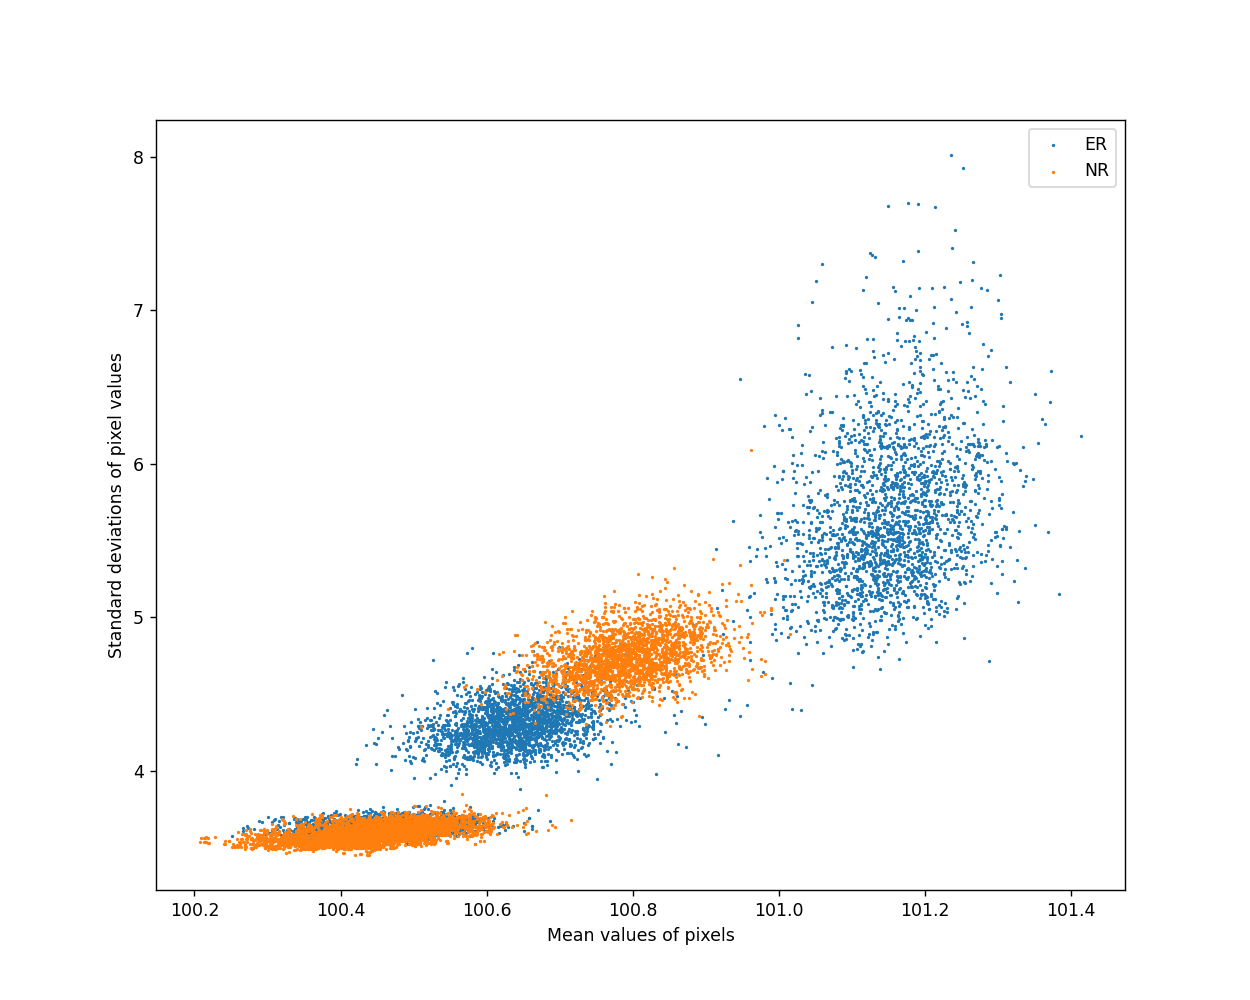

Text(0, 0.5, 'Standard deviations of pixel values')

In [202]:
plt.figure(figsize=(10, 8))
plt.scatter([np.mean(i) for i in ER_images], [np.std(i) for i in ER_images], label=f"ER", s=0.8)
plt.scatter([np.mean(i) for i in NR_images], [np.std(i) for i in NR_images], label=f"NR", s=0.8)
legend = plt.legend()
#for i in range(6):
#    legend.legendHandles[i]._sizes = [30]
plt.xlabel("Mean values of pixels")
plt.ylabel("Standard deviations of pixel values")

<IPython.core.display.Javascript object>


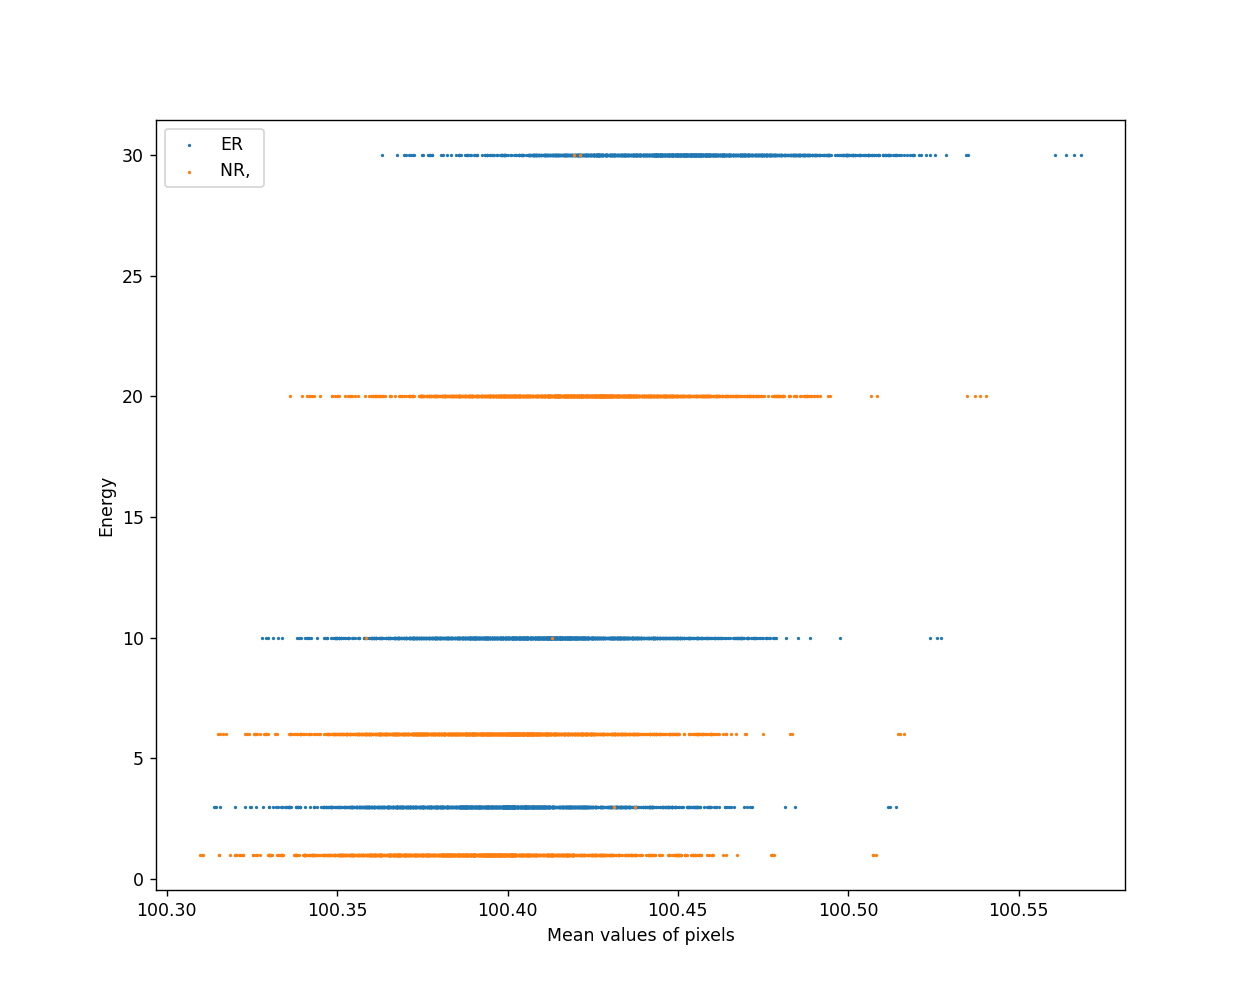

Text(0, 0.5, 'Energy')

In [203]:
plt.figure(figsize=(10, 8))
plt.scatter([np.mean(image) for image in ER_images_raw], [np.asarray([i for i in ER_targets]).T], \
                label=f"ER", s=0.8)
plt.scatter([np.mean(image) for image in NR_images_raw], [np.asarray([i for i in NR_targets]).T], \
                label=f"NR, ", s=0.8)
legend = plt.legend()

plt.xlabel("Mean values of pixels")
plt.ylabel("Energy")

<IPython.core.display.Javascript object>


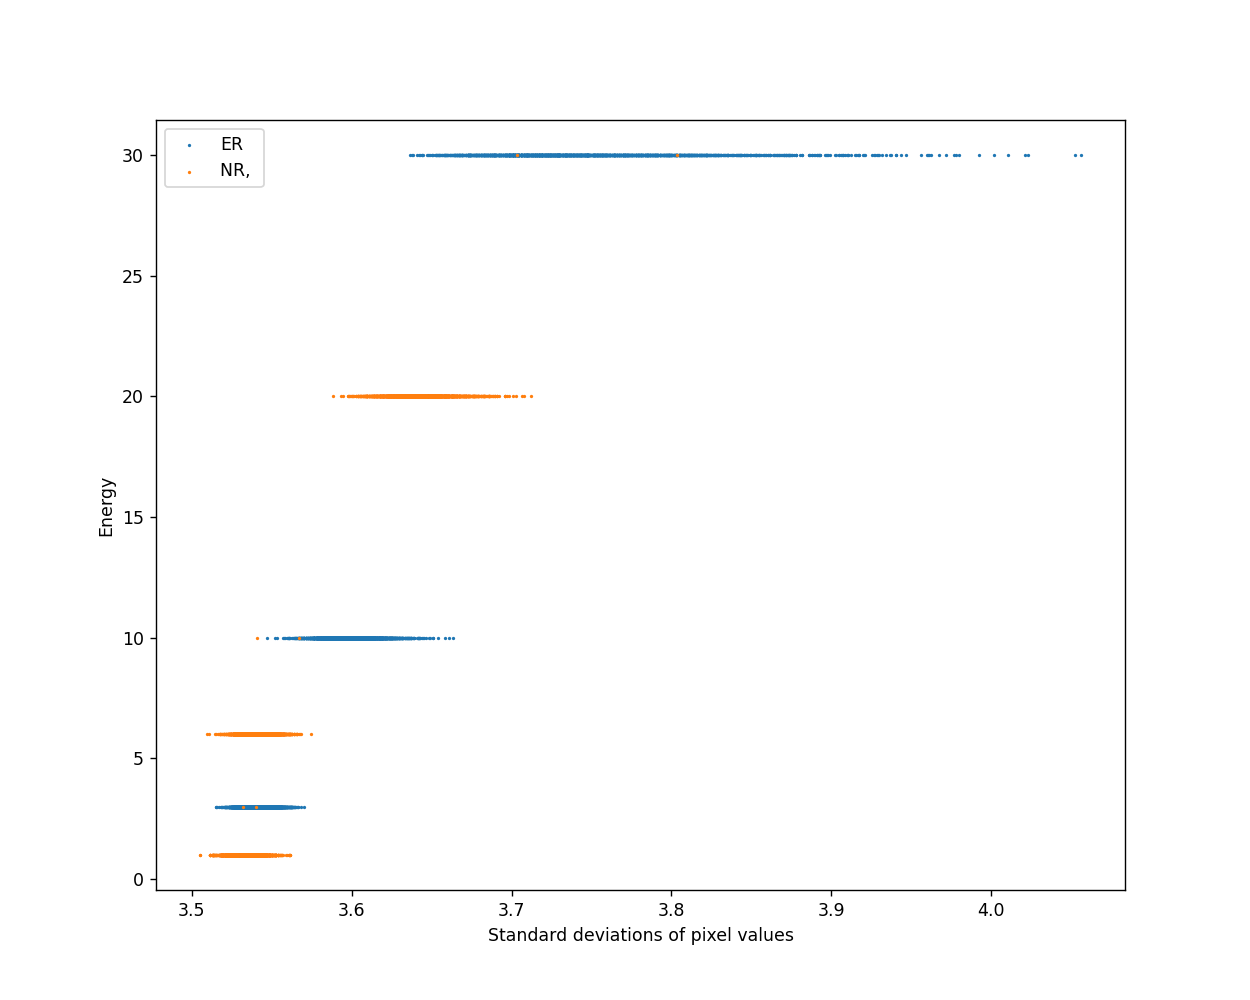

Text(0, 0.5, 'Energy')

In [204]:
plt.figure(figsize=(10, 8))
plt.scatter([np.std(image) for image in ER_images_raw], [np.asarray([i for i in ER_targets]).T], \
                label=f"ER", s=0.8)
plt.scatter([np.std(image) for image in NR_images_raw], [np.asarray([i for i in NR_targets]).T], \
                label=f"NR, ", s=0.8)
legend = plt.legend()

plt.xlabel("Standard deviations of pixel values")
plt.ylabel("Energy")

In [207]:
import keras
from keras.layers import Input, Dense, Reshape, Lambda, Concatenate, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization, ReLU, Dropout, merge
from keras.layers.advanced_activations import ELU, PReLU, LeakyReLU, Softmax
from keras.activations import elu, selu, sigmoid, tanh
from keras.layers import AlphaDropout, Flatten
from keras.models import Model
from keras.regularizers import l1_l2, l1, l2
#import tensorflow as tf

In [ ]:
from keras.models import Model   
from keras.layers import * 
from keras.layers import merge, Add, concatenate
def base_model():
    
    
    
    input_layer = Input((160,160))
    #Start defining the input tensor:
    input_class = Input((1,)) 
    reshape_layer = Reshape((160, 160, 1))(input_layer)
    BN1_layer = BatchNormalization()(reshape_layer)
    conv2d_layer = Conv2D(64, 4, strides=1, padding="same")(BN1_layer)
    conv2d_layer = LeakyReLU()(conv2d_layer)
    conv2d_layer = MaxPooling2D((4, 4))(conv2d_layer)
    #conv2d_layer = AlphaDropout(0.25)(conv2d_layer)
    
    BN2_layer = BatchNormalization()(conv2d_layer)
    conv2d_layer = Conv2D(32, 2, strides=1, padding="same")(BN2_layer)
    conv2d_layer = MaxPooling2D((4, 4))(conv2d_layer)
    conv2d_layer = Softmax()(conv2d_layer)
    flat_layer = Flatten()(conv2d_layer)
    
    #dropout_layer = Dropout(0.25)(BN3_layer)
    
    model_layer = Dropout(0.25)(flat_layer)
    
    model_layer = Dense(128, kernel_regularizer="l1_l2")(model_layer)
    model_layer = LeakyReLU()(model_layer)
    model_layer = Dropout(0.25)(model_layer)    

    model_layer = Dense(64)(model_layer)
    model_layer = LeakyReLU()(model_layer)
    model_layer = Dropout(0.25)(model_layer)
    
    model_layer = Dense(64)(model_layer)
    model_layer = LeakyReLU()(model_layer)
    
    #model_layer = AlphaDropout(0.25)(model_layer)
    
    model_layer = Dense(64)(model_layer)
    model_layer = Dropout(0.25)(flat_layer)
    
    #model_layer = AlphaDropout(0.25)(model_layer)
    
    #trying something a la ResNet? ie,  this is a skip connection to help stabilise training dynamics, 
    # but isntead of using the input images as the 'skipped-through'(?) input, I use 'class-labels'.
    # while this isn't a classification problem, it's useful I assume, for the network to learn implicitly
    # what's an NR vs. ER image, plus this allows to use benefits of a skip connection without making 
    # the network bloated in the middle by flattening the input images or something
    
    merge_layer = concatenate([model_layer, input_class])
    
    do_layer = Dropout(0.25)(merge_layer)
    
    regressor_layer = Dense(1)(do_layer)
    regressor_layer = LeakyReLU()(regressor_layer)
    #regressor_layer = Lambda(lambda x: (x*(higherbound-lowerbound))+lowerbound)(regressor_layer)
    #regressor_layer = keras.backend.clip(regressor_layer, lowerbound, higherbound)
    
    model = Model(inputs=[input_layer,input_class], outputs=[regressor_layer])
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['mean_squared_logarithmic_error', 'mae','mse'])
    
    
    print (model.summary())
    return model

def base_model(lowerbound=None, higherbound=None):
    if not (lowerbound==None and higherbound==None) and not (lowerbound!=None and higherbound!=None):
        raise Exception("lowerbound and higherbound must be specified at the same time!")
    input_layer = Input((120, 120))
    reshape_layer = Reshape((120, 120, 1))(input_layer)
    conv2d_layer = BatchNormalization()(reshape_layer)
    
    conv2d_layer = Conv2D(16, 5, strides=1, padding="same")(conv2d_layer)
    conv2d_layer = ReLU()(conv2d_layer)
    conv2d_layer = MaxPooling2D((4, 4))(conv2d_layer)
    
    #conv2d_layer = BatchNormalization()(conv2d_layer)
    conv2d_layer = Conv2D(32, 5, strides=1, padding="same")(conv2d_layer)
    conv2d_layer = ReLU()(conv2d_layer)
    conv2d_layer = MaxPooling2D((4, 4))(conv2d_layer)
    conv2d_layer = Reshape((1568,))(conv2d_layer)
    
    dropout_layer = Dropout(0.5)(conv2d_layer)
    
    model_layer = Dense(50, activation="relu", kernel_regularizer=l1_l2(l1=1e-3, l2=1e-3))(dropout_layer)
    model_layer = Dense(50, activation="relu", kernel_regularizer=l1_l2(l1=1e-3, l2=1e-3))(model_layer)
    model_layer = Dense(50, activation="relu", kernel_regularizer=l1_l2(l1=1e-3, l2=1e-3))(model_layer)
    
    if lowerbound != None and higherbound != None:
        regressor_layer = Dense(1, activation="relu")(model_layer)
        regressor_layer = Lambda(lambda x: (x*(higherbound-lowerbound))+lowerbound)(regressor_layer)
        regressor_layer = tf.clip_by_value(regressor_layer, lowerbound, higherbound, name=None)
        model = Model(inputs=[input_layer], outputs=[*regressor_layer])
        model.compile(loss="MSE", optimizer="adam")
    elif lowerbound == None and higherbound == None:
        classifier_layer = Dense(1, activation="sigmoid")(model_layer)
        model = Model(inputs=[input_layer], outputs=[classifier_layer])
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
   
    return model

In [257]:
model=base_model()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_83 (InputLayer)           (None, 160, 160)     0                                            
__________________________________________________________________________________________________
reshape_41 (Reshape)            (None, 160, 160, 1)  0           input_83[0][0]                   
__________________________________________________________________________________________________
batch_normalization_90 (BatchNo (None, 160, 160, 1)  4           reshape_41[0][0]                 
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 160, 160, 64) 1088        batch_normalization_90[0][0]     
___________________________________________________________________________________________

In [258]:
keras.backend

<module 'keras.backend' from '/shome/kdatta/anaconda3/envs/ML4HEP/lib/python3.7/site-packages/keras/backend/__init__.py'>

In [259]:
train_split, val_split, test_split = 0.6, 0.2, 0.2

In [260]:
from random import shuffle
X = np.concatenate((ER_images, NR_images))
class_labels = np.concatenate((np.ones(ER_images.shape[0]),np.zeros(NR_images.shape[0])))
Y = np.concatenate((ER_targets, NR_targets))

ind_list = list(range(X.shape[0]))
print (ind_list[0:10])
shuffle(ind_list)
print (ind_list[0:10])

X = X[ind_list]
class_labels = class_labels[ind_list]
Y = Y[ind_list]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[12512, 10093, 13017, 6052, 7308, 5064, 6326, 10317, 8664, 4348]


In [261]:
X_train = X[0:int(np.floor(train_split*X.shape[0]))]
X_val = X[int(np.ceil(train_split*X.shape[0])): int(np.floor(train_split*X.shape[0]+val_split*X.shape[0]))]
X_test  = X[int(np.ceil(train_split*X.shape[0]+val_split*X.shape[0])): ]

In [262]:
Y_train = Y[0:int(np.floor(train_split*X.shape[0]))]
Y_val = Y[int(np.ceil(train_split*X.shape[0])): int(np.floor(train_split*X.shape[0]+val_split*X.shape[0]))]
Y_test  = Y[int(np.ceil(train_split*X.shape[0]+val_split*X.shape[0])): ]

In [263]:
class_labels_train = class_labels[0:int(np.floor(train_split*class_labels.shape[0]))]
class_labels_val = class_labels[int(np.ceil(train_split*class_labels.shape[0])): int(np.floor(train_split*class_labels.shape[0]+val_split*class_labels.shape[0]))]
class_labels_test  = class_labels[int(np.ceil(train_split*class_labels.shape[0]+val_split*class_labels.shape[0])): ]

In [264]:
print (X_train.shape, X_val.shape, X_test.shape)

(8042, 160, 160) (2680, 160, 160) (2680, 160, 160)


In [265]:
print (class_labels_train.shape, class_labels_val.shape, class_labels_test.shape)

(8042,) (2680,) (2680,)


In [266]:
print (Y_train.shape, Y_val.shape, Y_test.shape)

(8042,) (2680,) (2680,)


In [267]:
from keras.callbacks import EarlyStopping, History, TensorBoard

In [268]:
model = base_model()

es = EarlyStopping(monitor='val_mse', verbose=1, patience=10, mode='auto' )
#tb = TensorBoard(log_dir='./Graph{}', histogram_freq=0, write_graph=True, write_images=True) #TensorBoard Monitoring

history=model.fit([X_train,class_labels_train], Y_train, epochs=1000, shuffle=True, 
                  use_multiprocessing=True, workers=2,
                  validation_data=([X_val, class_labels_val], Y_val), 
                  callbacks= [es])

Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_85 (InputLayer)           (None, 160, 160)     0                                            
__________________________________________________________________________________________________
reshape_42 (Reshape)            (None, 160, 160, 1)  0           input_85[0][0]                   
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 160, 160, 1)  4           reshape_42[0][0]                 
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 160, 160, 64) 1088        batch_normalization_92[0][0]     
___________________________________________________________________________________________

Epoch 17/1000
8042/8042 [==============================] - 7s 927us/step - loss: 93.5560 - mean_squared_logarithmic_error: 0.8896 - mae: 8.2483 - mse: 93.5560 - val_loss: 89.9716 - val_mean_squared_logarithmic_error: 0.8963 - val_mae: 8.1434 - val_mse: 89.9716
Epoch 18/1000
8042/8042 [==============================] - 8s 941us/step - loss: 91.6219 - mean_squared_logarithmic_error: 0.8762 - mae: 8.1664 - mse: 91.6219 - val_loss: 88.5051 - val_mean_squared_logarithmic_error: 0.8854 - val_mae: 8.0963 - val_mse: 88.5051
Epoch 19/1000
8042/8042 [==============================] - 7s 921us/step - loss: 91.0432 - mean_squared_logarithmic_error: 0.8642 - mae: 8.1106 - mse: 91.0432 - val_loss: 87.0401 - val_mean_squared_logarithmic_error: 0.8811 - val_mae: 8.0590 - val_mse: 87.0401
Epoch 20/1000
8042/8042 [==============================] - 7s 920us/step - loss: 88.8509 - mean_squared_logarithmic_error: 0.8570 - mae: 8.0486 - mse: 88.8509 - val_loss: 85.1906 - val_mean_squared_logarithmic_error: 

8042/8042 [==============================] - 8s 936us/step - loss: 47.6483 - mean_squared_logarithmic_error: 0.4975 - mae: 5.5021 - mse: 47.6483 - val_loss: 43.1874 - val_mean_squared_logarithmic_error: 0.4969 - val_mae: 5.3414 - val_mse: 43.1874
Epoch 49/1000
8042/8042 [==============================] - 7s 899us/step - loss: 47.0117 - mean_squared_logarithmic_error: 0.4959 - mae: 5.4717 - mse: 47.0117 - val_loss: 42.1448 - val_mean_squared_logarithmic_error: 0.4728 - val_mae: 5.2358 - val_mse: 42.1448
Epoch 50/1000
8042/8042 [==============================] - 7s 908us/step - loss: 45.7684 - mean_squared_logarithmic_error: 0.4822 - mae: 5.3870 - mse: 45.7685 - val_loss: 40.9572 - val_mean_squared_logarithmic_error: 0.4793 - val_mae: 5.2314 - val_mse: 40.9571
Epoch 51/1000
8042/8042 [==============================] - 8s 953us/step - loss: 45.0117 - mean_squared_logarithmic_error: 0.4692 - mae: 5.3085 - mse: 45.0117 - val_loss: 39.9840 - val_mean_squared_logarithmic_error: 0.4562 - val_m

8042/8042 [==============================] - 8s 934us/step - loss: 26.9519 - mean_squared_logarithmic_error: 0.2970 - mae: 3.9435 - mse: 26.9519 - val_loss: 21.2964 - val_mean_squared_logarithmic_error: 0.2639 - val_mae: 3.4570 - val_mse: 21.2964
Epoch 80/1000
8042/8042 [==============================] - 8s 940us/step - loss: 26.8025 - mean_squared_logarithmic_error: 0.2919 - mae: 3.9282 - mse: 26.8025 - val_loss: 20.9883 - val_mean_squared_logarithmic_error: 0.2529 - val_mae: 3.5085 - val_mse: 20.9883
Epoch 81/1000
8042/8042 [==============================] - 7s 872us/step - loss: 26.5711 - mean_squared_logarithmic_error: 0.2879 - mae: 3.9103 - mse: 26.5711 - val_loss: 20.4791 - val_mean_squared_logarithmic_error: 0.2450 - val_mae: 3.4366 - val_mse: 20.4791
Epoch 82/1000
8042/8042 [==============================] - 7s 883us/step - loss: 26.2077 - mean_squared_logarithmic_error: 0.2846 - mae: 3.8720 - mse: 26.2077 - val_loss: 20.1289 - val_mean_squared_logarithmic_error: 0.2313 - val_m

8042/8042 [==============================] - 7s 931us/step - loss: 19.5790 - mean_squared_logarithmic_error: 0.2141 - mae: 3.2912 - mse: 19.5790 - val_loss: 12.9384 - val_mean_squared_logarithmic_error: 0.1576 - val_mae: 2.6327 - val_mse: 12.9384
Epoch 111/1000
8042/8042 [==============================] - 8s 938us/step - loss: 20.1082 - mean_squared_logarithmic_error: 0.2198 - mae: 3.3308 - mse: 20.1082 - val_loss: 12.6419 - val_mean_squared_logarithmic_error: 0.1504 - val_mae: 2.6023 - val_mse: 12.6419
Epoch 112/1000
8042/8042 [==============================] - 7s 925us/step - loss: 19.2520 - mean_squared_logarithmic_error: 0.2092 - mae: 3.2616 - mse: 19.2520 - val_loss: 12.7054 - val_mean_squared_logarithmic_error: 0.1501 - val_mae: 2.6308 - val_mse: 12.7054
Epoch 113/1000
8042/8042 [==============================] - 7s 916us/step - loss: 19.2183 - mean_squared_logarithmic_error: 0.2102 - mae: 3.2399 - mse: 19.2183 - val_loss: 12.4427 - val_mean_squared_logarithmic_error: 0.1531 - va

8042/8042 [==============================] - 7s 928us/step - loss: 15.7463 - mean_squared_logarithmic_error: 0.1715 - mae: 2.9121 - mse: 15.7463 - val_loss: 9.3044 - val_mean_squared_logarithmic_error: 0.1069 - val_mae: 2.2119 - val_mse: 9.3044
Epoch 142/1000
8042/8042 [==============================] - 7s 917us/step - loss: 16.0480 - mean_squared_logarithmic_error: 0.1741 - mae: 2.9039 - mse: 16.0480 - val_loss: 9.3877 - val_mean_squared_logarithmic_error: 0.1059 - val_mae: 2.1837 - val_mse: 9.3877
Epoch 143/1000
8042/8042 [==============================] - 7s 930us/step - loss: 15.7853 - mean_squared_logarithmic_error: 0.1761 - mae: 2.9117 - mse: 15.7853 - val_loss: 9.0661 - val_mean_squared_logarithmic_error: 0.1087 - val_mae: 2.1754 - val_mse: 9.0661
Epoch 144/1000
8042/8042 [==============================] - 7s 899us/step - loss: 16.2012 - mean_squared_logarithmic_error: 0.1813 - mae: 2.9578 - mse: 16.2012 - val_loss: 9.2841 - val_mean_squared_logarithmic_error: 0.1099 - val_mae: 

8042/8042 [==============================] - 7s 914us/step - loss: 14.4266 - mean_squared_logarithmic_error: 0.1572 - mae: 2.7440 - mse: 14.4266 - val_loss: 7.6081 - val_mean_squared_logarithmic_error: 0.0810 - val_mae: 1.9397 - val_mse: 7.6081
Epoch 173/1000
8042/8042 [==============================] - 8s 934us/step - loss: 14.3481 - mean_squared_logarithmic_error: 0.1565 - mae: 2.7449 - mse: 14.3481 - val_loss: 7.5902 - val_mean_squared_logarithmic_error: 0.0856 - val_mae: 1.9521 - val_mse: 7.5902
Epoch 174/1000
8042/8042 [==============================] - 8s 952us/step - loss: 14.4065 - mean_squared_logarithmic_error: 0.1539 - mae: 2.7638 - mse: 14.4065 - val_loss: 7.4763 - val_mean_squared_logarithmic_error: 0.0874 - val_mae: 1.9400 - val_mse: 7.4763
Epoch 175/1000
8042/8042 [==============================] - 8s 941us/step - loss: 14.4417 - mean_squared_logarithmic_error: 0.1544 - mae: 2.7430 - mse: 14.4417 - val_loss: 7.5805 - val_mean_squared_logarithmic_error: 0.0793 - val_mae: 

8042/8042 [==============================] - 7s 920us/step - loss: 13.4147 - mean_squared_logarithmic_error: 0.1439 - mae: 2.6417 - mse: 13.4147 - val_loss: 6.9490 - val_mean_squared_logarithmic_error: 0.0729 - val_mae: 1.8307 - val_mse: 6.9490
Epoch 204/1000
8042/8042 [==============================] - 7s 923us/step - loss: 13.1821 - mean_squared_logarithmic_error: 0.1467 - mae: 2.6268 - mse: 13.1821 - val_loss: 7.1930 - val_mean_squared_logarithmic_error: 0.0660 - val_mae: 1.8406 - val_mse: 7.1930
Epoch 205/1000
8042/8042 [==============================] - 7s 908us/step - loss: 13.7089 - mean_squared_logarithmic_error: 0.1476 - mae: 2.6479 - mse: 13.7089 - val_loss: 6.7653 - val_mean_squared_logarithmic_error: 0.0730 - val_mae: 1.8234 - val_mse: 6.7653
Epoch 206/1000
8042/8042 [==============================] - 8s 955us/step - loss: 13.0025 - mean_squared_logarithmic_error: 0.1407 - mae: 2.6067 - mse: 13.0025 - val_loss: 6.6750 - val_mean_squared_logarithmic_error: 0.0729 - val_mae: 

8042/8042 [==============================] - 7s 912us/step - loss: 12.8496 - mean_squared_logarithmic_error: 0.1370 - mae: 2.5570 - mse: 12.8496 - val_loss: 6.4382 - val_mean_squared_logarithmic_error: 0.0669 - val_mae: 1.7523 - val_mse: 6.4382
Epoch 235/1000
8042/8042 [==============================] - 8s 963us/step - loss: 12.3072 - mean_squared_logarithmic_error: 0.1348 - mae: 2.5119 - mse: 12.3072 - val_loss: 6.2676 - val_mean_squared_logarithmic_error: 0.0645 - val_mae: 1.7285 - val_mse: 6.2676
Epoch 236/1000
8042/8042 [==============================] - 8s 937us/step - loss: 12.1874 - mean_squared_logarithmic_error: 0.1354 - mae: 2.5129 - mse: 12.1874 - val_loss: 6.7186 - val_mean_squared_logarithmic_error: 0.0705 - val_mae: 1.7864 - val_mse: 6.7186
Epoch 237/1000
8042/8042 [==============================] - 8s 971us/step - loss: 12.2141 - mean_squared_logarithmic_error: 0.1350 - mae: 2.5020 - mse: 12.2141 - val_loss: 6.4044 - val_mean_squared_logarithmic_error: 0.0625 - val_mae: 

<IPython.core.display.Javascript object>


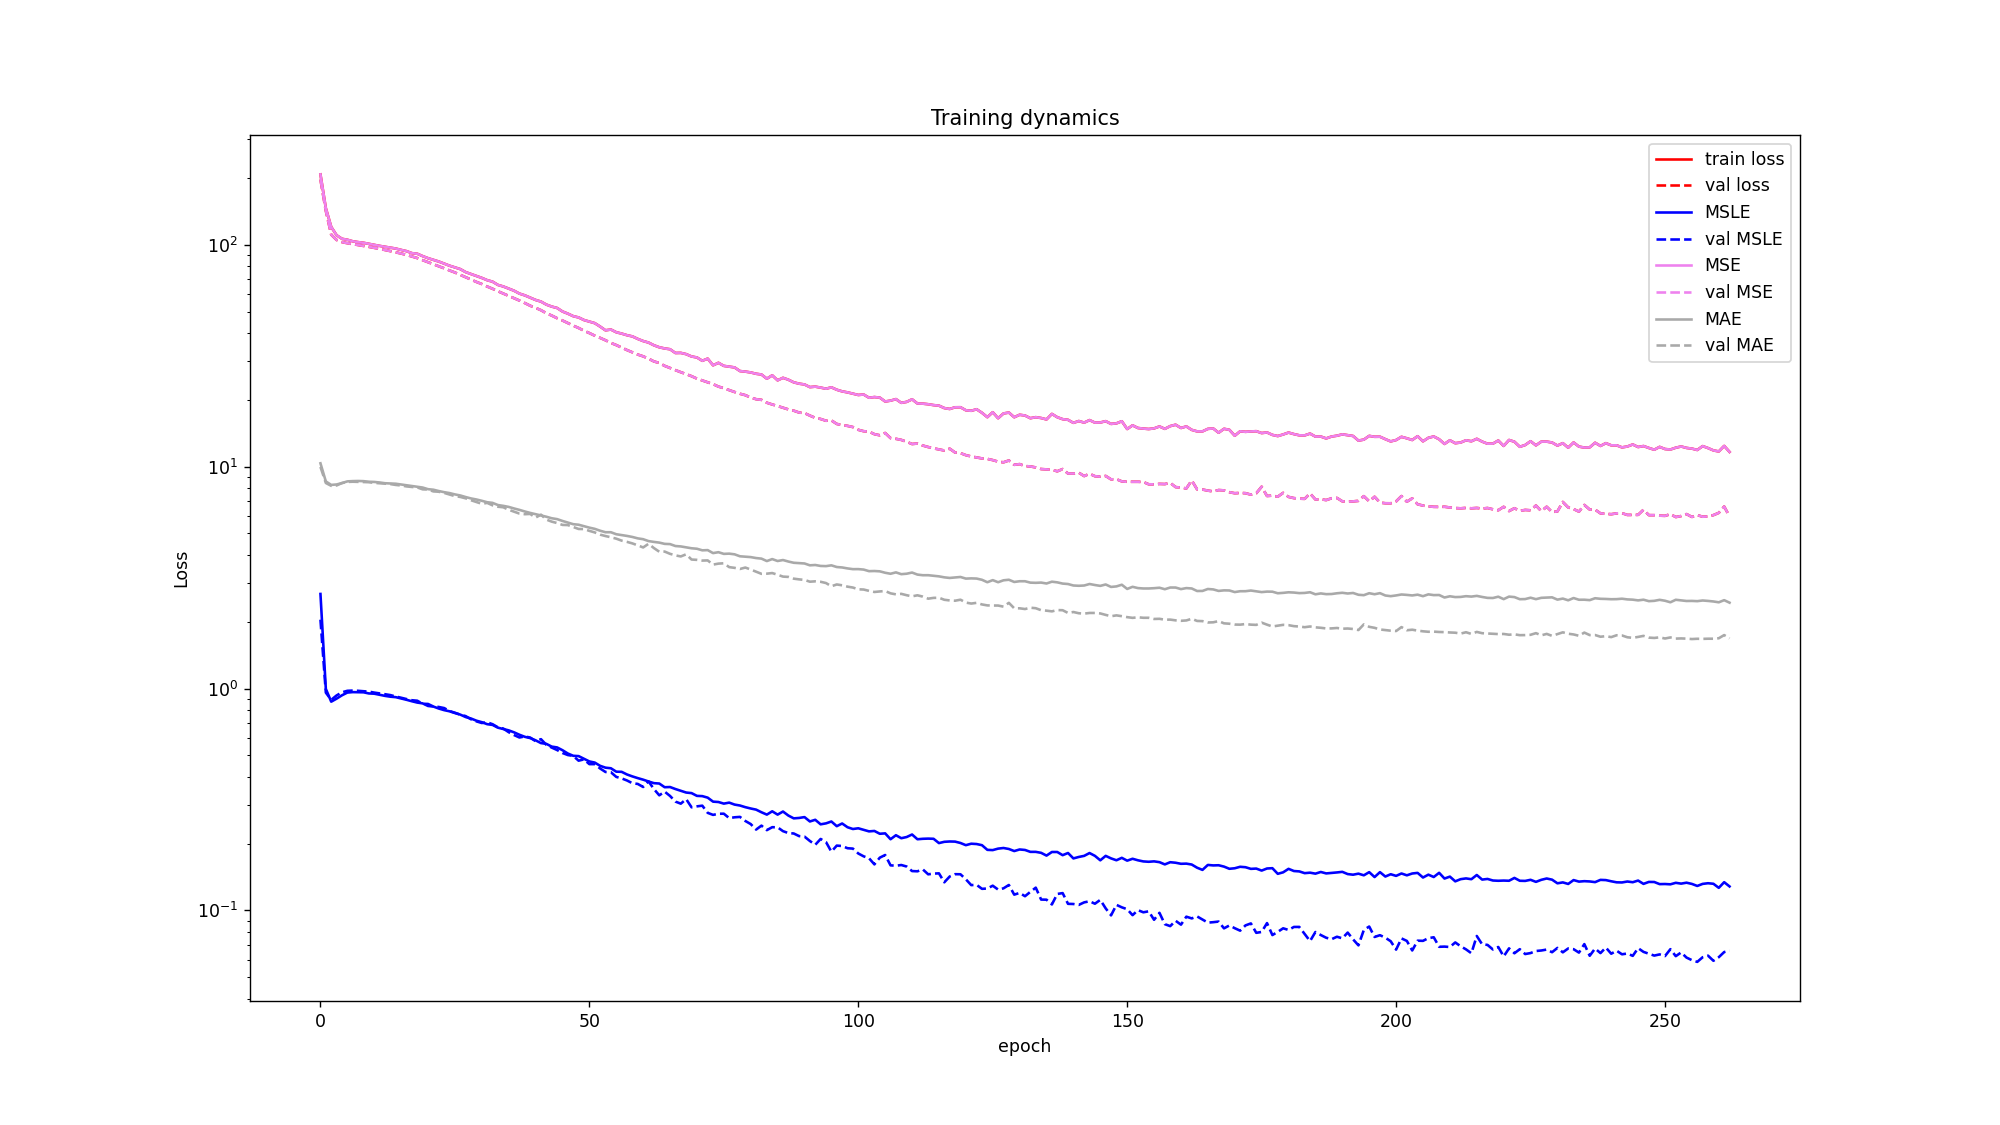

In [270]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='r', linestyle='--')

plt.plot(history.history['mean_squared_logarithmic_error'], color='b')
plt.plot(history.history['val_mean_squared_logarithmic_error'], color='b', linestyle='--')

plt.plot(history.history['mse'], color='violet')
plt.plot(history.history['val_mse'], color='violet', linestyle='--')

plt.plot(history.history['mae'], color='darkgray')
plt.plot(history.history['val_mae'], color='darkgray', linestyle='--')


plt.title('Training dynamics')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss', 'MSLE', 'val MSLE', 'MSE', 'val MSE', 'MAE', 'val MAE'], 
           loc='best')
plt.yscale('log')
plt.show()

<IPython.core.display.Javascript object>


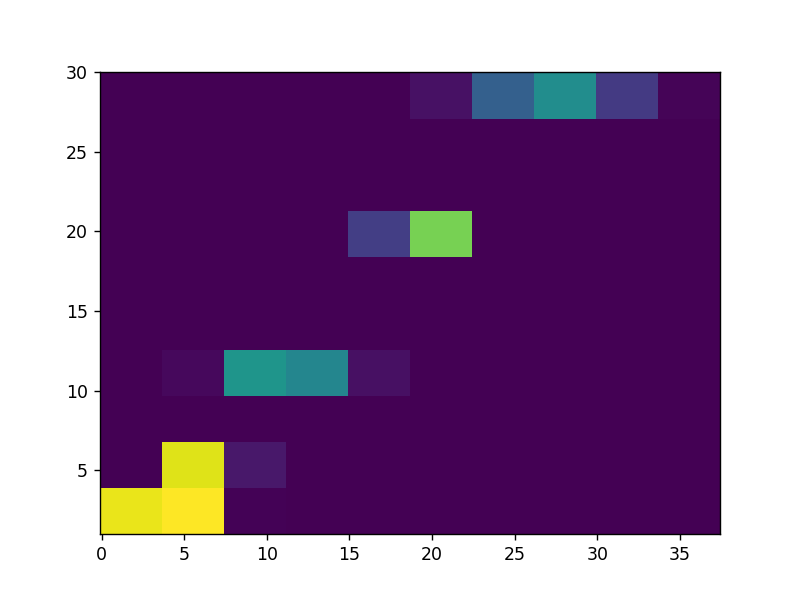

[ 4.9751472 18.27499   17.828072  ... 20.162422   2.5455813 13.438933 ]


(array([[1.47580016e-02, 1.14314498e-05, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.52609854e-02, 1.45179412e-02, 0.00000000e+00, 3.54374942e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [9.14515980e-05, 9.83104679e-04, 0.00000000e+00, 7.93342613e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.00747870e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.28729736e-04,
         0.00000000e+00, 0.00000000e+00, 2.78927374e-03, 0.00000000e+00,
         0.00000000e+00, 1.14314498e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0

In [276]:
plt.figure()
pred = np.array(model.predict([X_train,class_labels_train]).flatten())
print (pred)
plt.hist2d(pred, Y_train, density=True, bins = [10,10])#hist2d(x, y, bins=10, range=None,


<IPython.core.display.Javascript object>


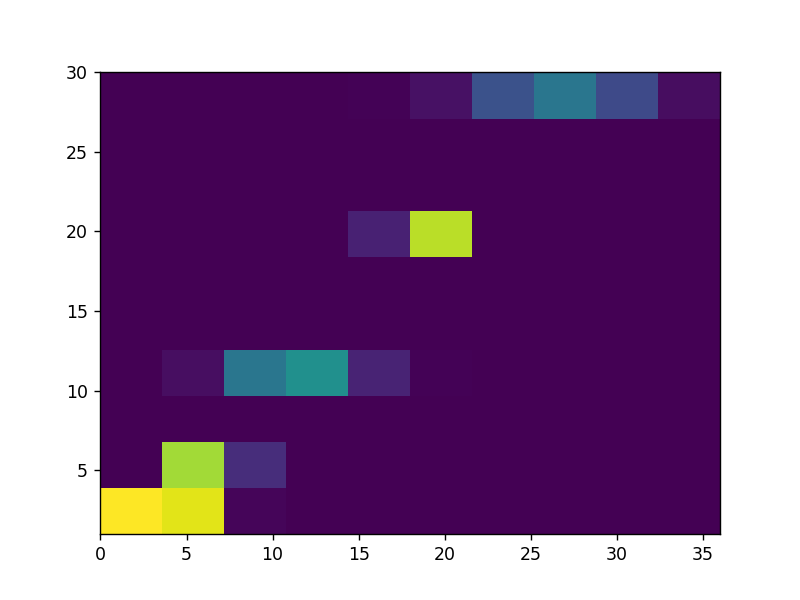

[ 5.5820765 13.816704  26.864079  ...  6.3353543  1.3579295  5.4690537]


(array([[1.61449793e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.53948807e-02, 1.38946835e-02, 0.00000000e+00, 5.71503691e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [2.14313884e-04, 2.07170088e-03, 0.00000000e+00, 6.32225959e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.03677066e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.57163515e-03,
         0.00000000e+00, 0.00000000e+00, 1.46447821e-03, 0.00000000e+00,
         0.00000000e+00, 1.07156942e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.1

In [277]:
plt.figure()
pred = np.array(model.predict([X_val,class_labels_val]).flatten())
print (pred)
plt.hist2d(pred, Y_val, density=True, bins = [10,10])#hist2d(x, y, bins=10, range=None,


<IPython.core.display.Javascript object>


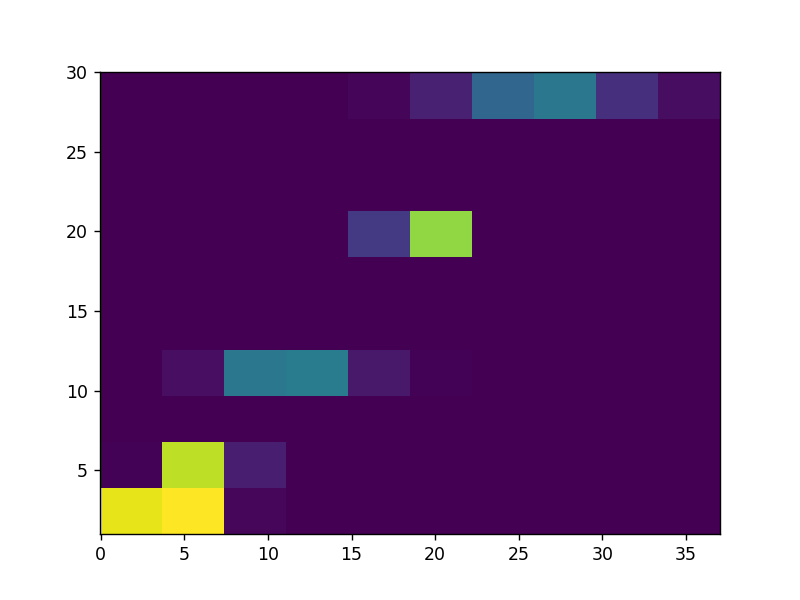

[23.892567  23.225405   5.115606  ... 15.615254   1.7797959 13.804533 ]


(array([[1.52322413e-02, 1.04092765e-04, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.57874027e-02, 1.41913136e-02, 0.00000000e+00, 5.89859002e-04,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [2.77580707e-04, 1.31850836e-03, 0.00000000e+00, 6.24556591e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.52314661e-03,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.04092765e-03,
         0.00000000e+00, 0.00000000e+00, 2.67171430e-03, 0.00000000e+00,
         0.00000000e+00, 2.08185530e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.9

In [271]:
plt.figure()
pred = np.array(model.predict([X_test,class_labels_test]).flatten())
print (pred)
plt.hist2d(pred, Y_test, density=True, bins = [10,10])#hist2d(x, y, bins=10, range=None,

#plt.hist()

#plt.legend(loc="upper center");

In [273]:
model.save('Half_trained_kindaResNet')

### Sneak peak at performance on train, val, samll_test data to have an expectation regarding what we see in the larger test set (assuming the train,val,small_test sets were well shuffled)


In [295]:
import os

In [307]:
#this includes images we trained, valideated and carried out a small test on; 
#note we randomise the class labels here (unlike in training) to check for robustness of model:
# seems it's already pretty dang good!
#tomorrow I'll update this by adding a pre-trained discriminator with frozen weights to automatically produce these class
#labels during training without them having to be added by hand (since I dunno if that's allowed), plus a little bit of 
#chaos/stochasticity is nice to make the regressor more robust in its training since the discriminator won't be 'perfect'

In [299]:
train_image_collection = []
train_image_names = []
for filepath in tqdm.tqdm(glob.glob("train/*/*.png")):
    image_hist = imageio.imread(filepath)[208:368, 208:368]
    train_image_collection.append(image_hist)
    train_image_names.append(os.path.splitext(os.path.basename(filepath))[0])
train_image_collection = np.asarray(train_image_collection)

100%|██████████| 13404/13404 [00:26<00:00, 513.13it/s]


In [300]:
print (train_image_collection.shape)

(13404, 160, 160)


In [304]:
random_labels = np.concatenate((np.ones(int(train_image_collection.shape[0]/2)), np.zeros(int(train_image_collection.shape[0]/2))))
ind_list = list(range(random_labels.shape[0]))
print (ind_list[0:10])
shuffle(ind_list)
print (ind_list[0:10])

random_labels = random_labels[ind_list]
regressor_predict_train = model.predict([train_image_collection,random_labels]).flatten()
#regressor_low_predict = model_ER_if_low.predict(train_image_collection).flatten()
#regressor_high_or_low = model.predict(train_image_collection).flatten()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8815, 12737, 12867, 10600, 6229, 11280, 1111, 9209, 10109, 12641]


<IPython.core.display.Javascript object>


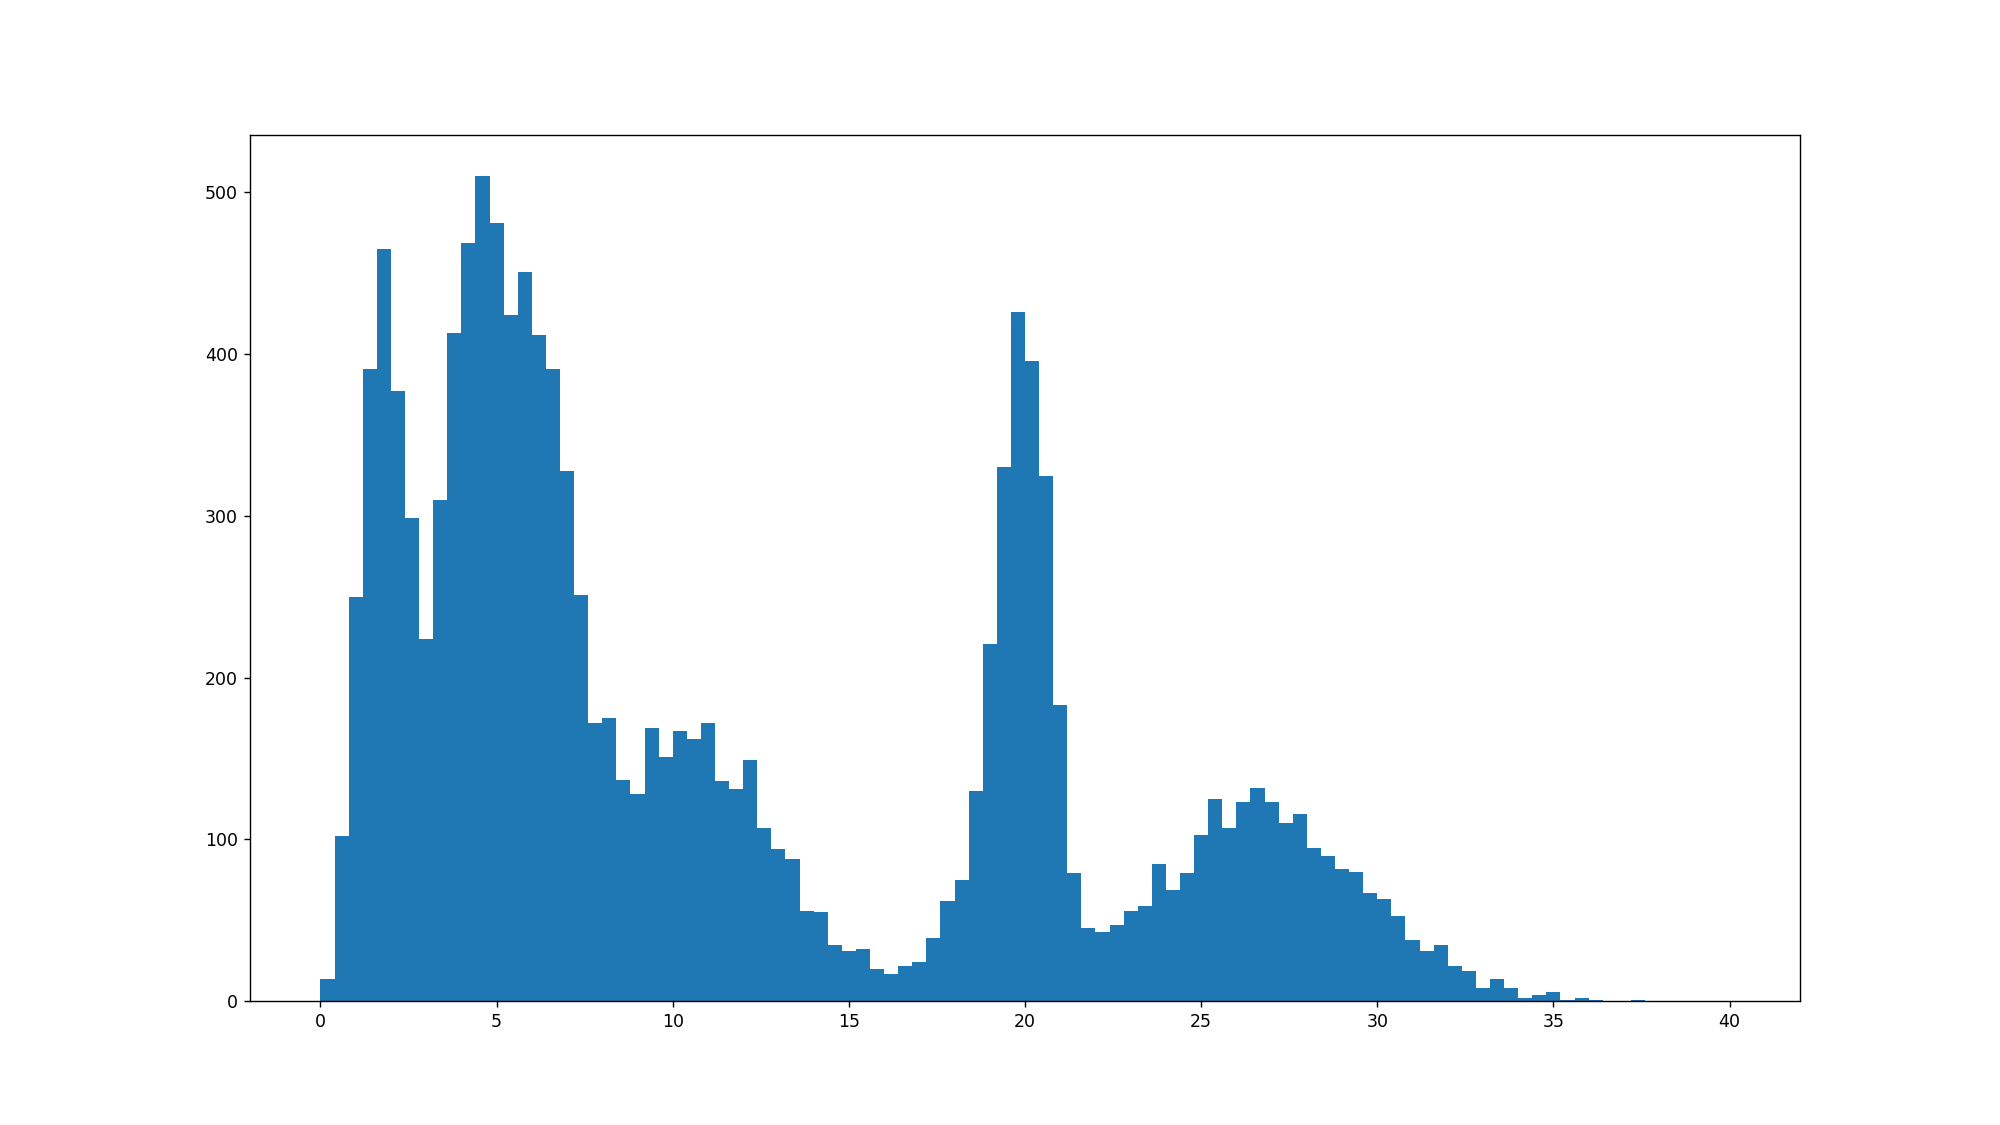

In [313]:
plt.figure(figsize=(16,9))
plt.hist(regressor_predict_train, range=(0, 40), bins=100)
plt.show()

In [317]:
#this includes images we carried out a small test on; note we randomise the class labels here to check for robustness of model 
# seems it's already pretty dang good!
#tomorrow I'll update this by adding a pre-trained discriminator with frozen weights to automatically produce these class
#labels during training without them having to be added by hand (since I dunno if that's allowed), plus a little bit of 
#chaos/stochasticity is nice to make the regressor more robust in its training since the discriminator won't be 'perfect'

In [315]:
print (X_test.shape)
random_labels = np.concatenate((np.ones(int(X_test.shape[0]/2)), np.zeros(int(X_test.shape[0]/2))))
ind_list = list(range(random_labels.shape[0]))
print (ind_list[0:10])
shuffle(ind_list)
print (ind_list[0:10])

random_labels = random_labels[ind_list]
regressor_predict_smalltest = model.predict([X_test,random_labels]).flatten()
#regressor_low_predict = model_ER_if_low.predict(train_image_collection).flatten()
#regressor_high_or_low = model.predict(train_image_collection).flatten()

(2680, 160, 160)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1428, 2265, 2604, 1311, 1124, 755, 468, 1537, 2118, 1144]


<IPython.core.display.Javascript object>


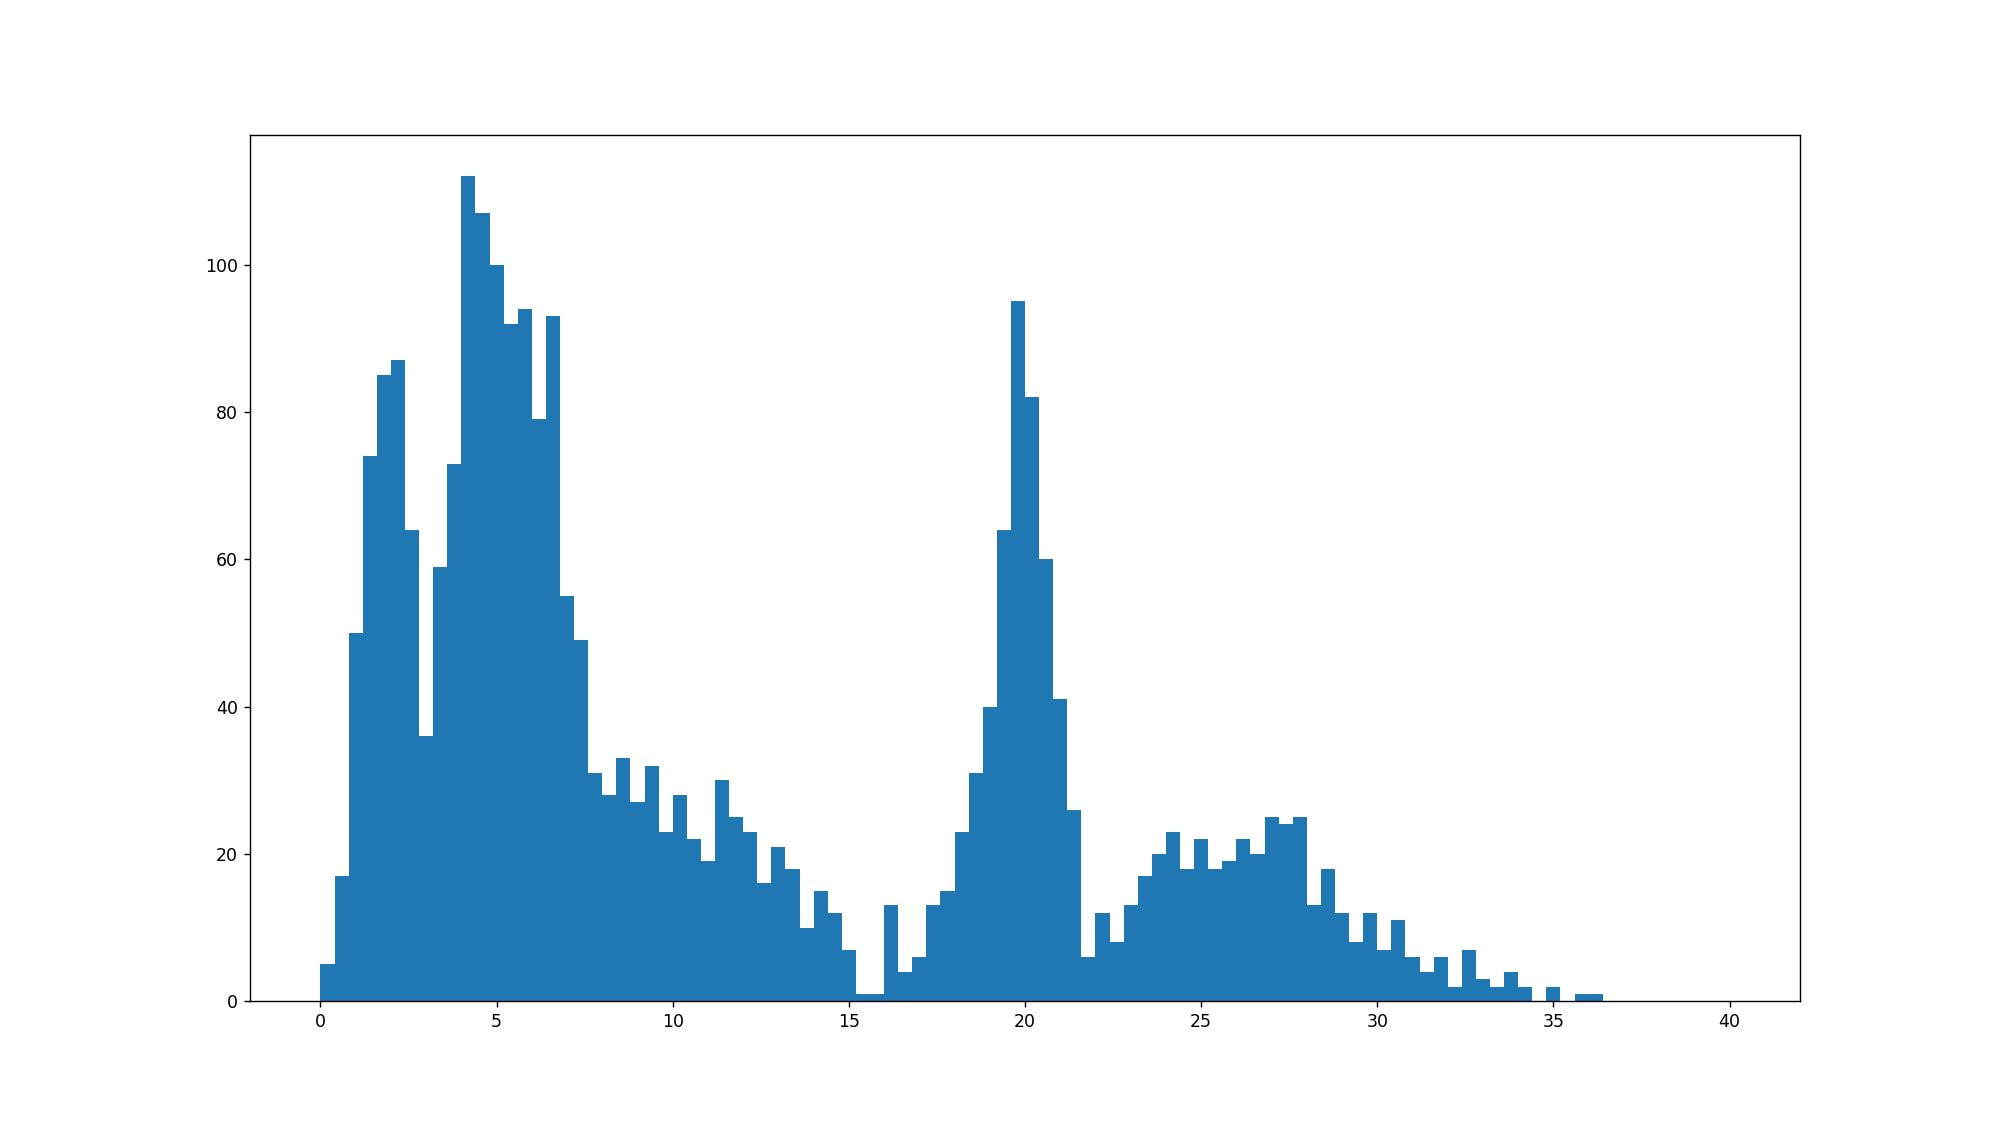

In [316]:
plt.figure(figsize=(16,9))
plt.hist(regressor_predict_smalltest, range=(0, 40), bins=100)
plt.show()

In [317]:
#this includes images we validated on; note we randomise the class labels here to check for robustness of model 
# seems it's already pretty dang good!
#tomorrow I'll update this by adding a pre-trained discriminator with frozen weights to automatically produce these class
#labels during training without them having to be added by hand (since I dunno if that's allowed), plus a little bit of 
#chaos/stochasticity is nice to make the regressor more robust in its training since the discriminator won't be 'perfect'

In [318]:
print (X_val.shape)
random_labels = np.concatenate((np.ones(int(X_val.shape[0]/2)), np.zeros(int(X_val.shape[0]/2))))
ind_list = list(range(random_labels.shape[0]))
print (ind_list[0:10])
shuffle(ind_list)
print (ind_list[0:10])

random_labels = random_labels[ind_list]
regressor_predict_val = model.predict([X_val,random_labels]).flatten()
#regressor_low_predict = model_ER_if_low.predict(train_image_collection).flatten()
#regressor_high_or_low = model.predict(train_image_collection).flatten()

(2680, 160, 160)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[53, 2295, 73, 1028, 921, 2471, 885, 2183, 1929, 1203]


<IPython.core.display.Javascript object>


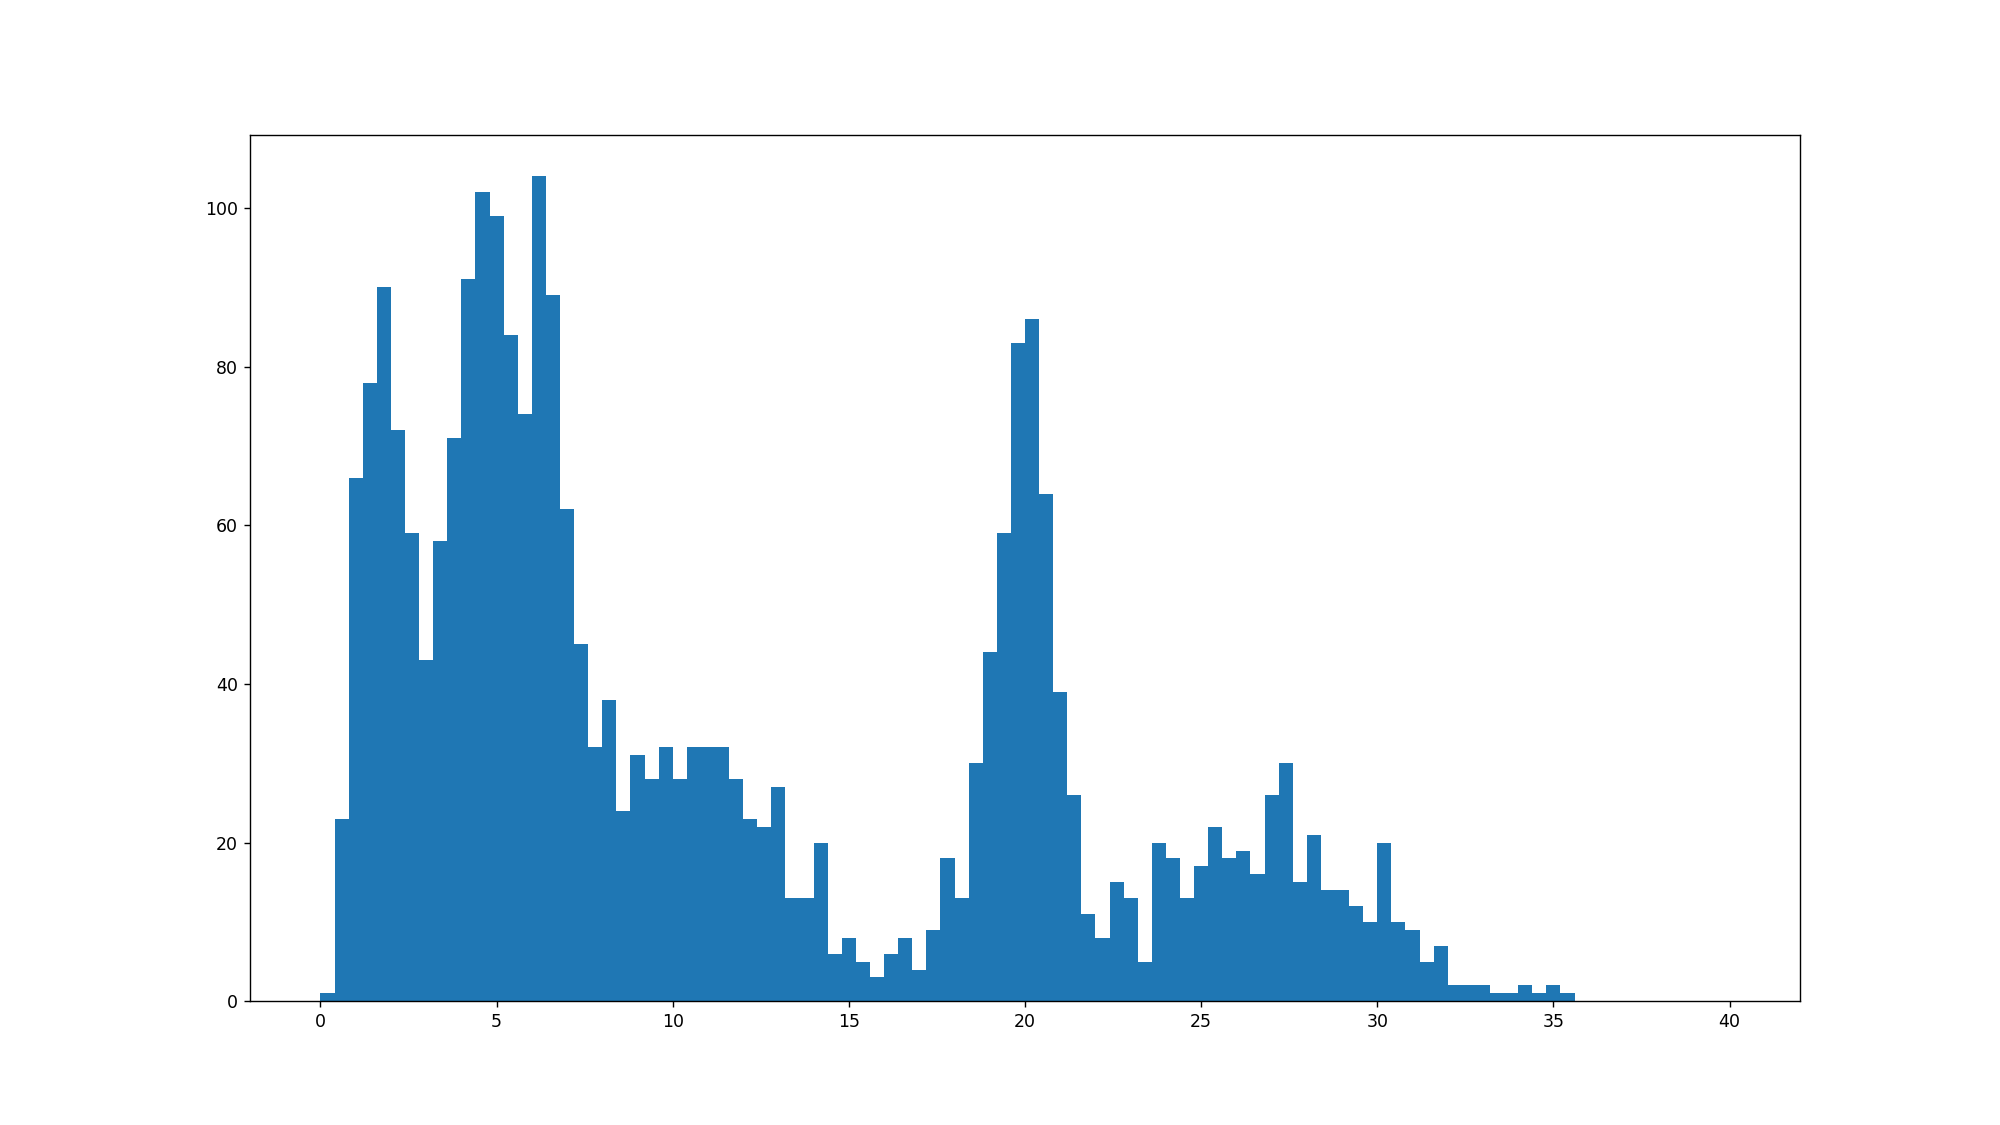

In [319]:
plt.figure(figsize=(16,9))
plt.hist(regressor_predict_val, range=(0, 40), bins=100)
plt.show()

##  Results


In [320]:
test_image_collection = []
test_image_names = []
for filepath in tqdm.tqdm(glob.glob("test/*.png")):
    image_hist = imageio.imread(filepath)[208:368, 208:368]
    test_image_collection.append(image_hist)
    test_image_names.append(os.path.splitext(os.path.basename(filepath))[0])
test_image_collection = np.asarray(test_image_collection)

100%|██████████| 16560/16560 [00:31<00:00, 527.59it/s]


In [321]:
print (test_image_collection.shape)

(16560, 160, 160)


In [322]:
random_labels = np.concatenate((np.ones(int(test_image_collection.shape[0]/2)), np.zeros(int(test_image_collection.shape[0]/2))))
ind_list = list(range(random_labels.shape[0]))
print (ind_list[0:10])
shuffle(ind_list)
print (ind_list[0:10])

random_labels = random_labels[ind_list]
regressor_predict_test = model.predict([test_image_collection,random_labels]).flatten()
#regressor_low_predict = model_ER_if_low.predict(test_image_collection).flatten()
#regressor_high_or_low = model.predict(test_image_collection).flatten()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9919, 2553, 7040, 1469, 4414, 8433, 916, 11868, 16101, 2247]


<IPython.core.display.Javascript object>


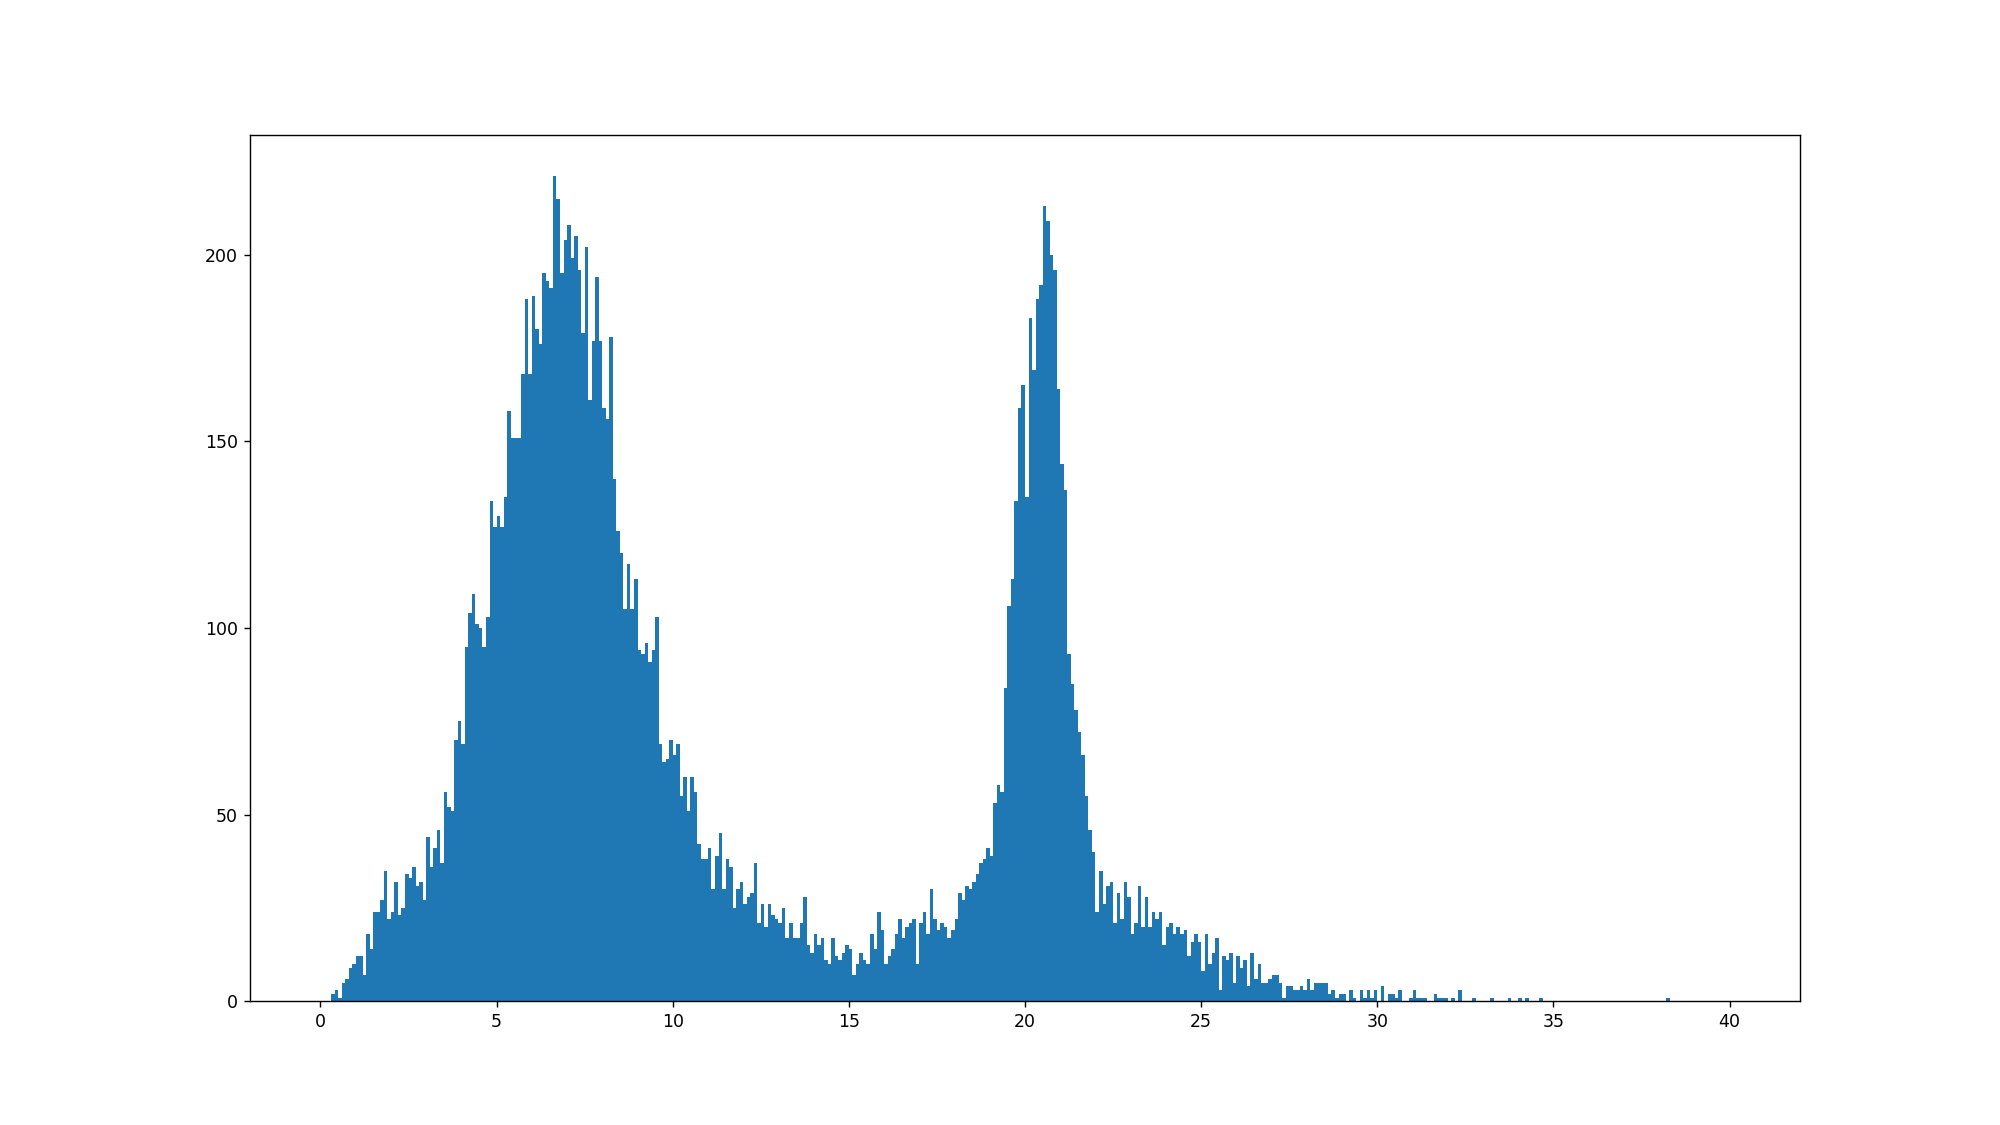

In [323]:
plt.figure(figsize=(16,9))
plt.hist(regressor_predict_test, range=(0, 40), bins=400)
plt.show()

### I think this is getting us somewhere close, will try more tomorrow!

In [324]:
regression_answer = pd.DataFrame(columns=["id", "particle"])
regression_answer["id"] = test_image_names
regression_answer["particle"] = regressor_predict_test

In [325]:
regression_answer.head()

,id,particle
0,da4007c2448ef26cf919d83a9c5197548fc01e0c,19.959389
1,b711f5e8d7f3446a83f0842031043de76e8ce86e,5.623726
2,41e75a8fb9276f59468692580f6f05e356b31dc8,20.489477
3,451dd05a8d9ec08a25a58314bbc397c380169cef,8.189995
4,19effc3f4374a7c20dd39d1c8e32181eaf3715ad,10.316181


In [ ]:
regression_answer.to_csv("regression_prediction_submission.csv")